다양한 기계학습 방법을 통해 online 뉴스 인기도 예측력를 극대화
 
최종 평가는 아래 test 데이터를 활용, 최종 예측 평가 지표는 MAE (Mean Absolute Error).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from graphviz import Source
from IPython.display import Image
# from sklearn.tree import export_graphviz

# #from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

## for regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

sns.set_style("whitegrid")

In [8]:
# from google.colab import drive
# drive.mount('/content/drive')

In [9]:
# path = "onlinenews.csv"
# data = pd.read_csv(path, engine='python')
# print("- Data has {} rows and {} columns.".format(*data.shape))
# print("- Column names: ", list(data.columns))

# X = data.drop([' shares'], axis=1)
# y = data[' shares']

데이터 6:2:2 Train valid test 구분

In [10]:
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     test_size=0.2,
#                                                     random_state=2015010720)
# # scaler = StandardScaler()
# # X_train = scaler.fit_transform(X_train)
# # X_test = scaler.transform(X_test)
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
#                                                       test_size=0.25,
#                                                       random_state=2015010720)

# # X_valid = scaler.transform(X_valid)

In [2]:
# 주어진 test_data.csv, valid_data.csv, train_data.csv 사용

train_df = pd.read_csv("train_data.csv")
valid_df = pd.read_csv("valid_Data.csv")
test_df  = pd.read_csv("test_data.csv")

X_train = train_df.drop(columns=[' shares'])
y_train = train_df[' shares']

X_valid = valid_df.drop(columns=[' shares'])
y_valid = valid_df[' shares']

X_test  = test_df.drop(columns=[' shares'])
y_test  = test_df[' shares']

최적 파라미터 조정 없이 학습 및 테스트 진행

In [ ]:
# clf_dt = DecisionTreeRegressor(criterion='squared_error', max_depth=None)
# clf_dt.fit(X_train, y_train)
# y_train_pred = clf_dt.predict(X_train)
# y_valid_pred = clf_dt.predict(X_valid)
# y_test_pred = clf_dt.predict(X_test)

In [ ]:
# # Show train & validation accuracies
# print('- MSE (Train)      : {:.4}'.format(mean_squared_error(y_train, y_train_pred)))
# print('- MSE (Validation) : {:.4}'.format(mean_squared_error(y_valid, y_valid_pred)))
# print('- MSE (test) : {:.4}'.format(mean_squared_error(y_test, y_test_pred)))
# print('- MAE (Train)      : {:.4}'.format(mean_absolute_error(y_train, y_train_pred)))
# print('- MAE (Validation) : {:}'.format(round(mean_absolute_error(y_valid, y_valid_pred))))
# print('- MAE (Validation) : {:}'.format(round(mean_absolute_error(y_test, y_test_pred))))

- MSE (Train)      : 0.0
- MSE (Validation) : 2.884e+08
- MSE (test) : 4.201e+08
- MAE (Train)      : 0.0
- MAE (Validation) : 4254
- MAE (Validation) : 4632


---

### EDA

In [14]:
# 기초 통계 및 결측치 확인
print("=== X 요약 통계 ===")
print(X.describe().T)
print("\n=== y 요약 통계 ===")
print(y.describe())
print("\n=== 결측치 개수 ===")
na_X = X.isna().sum()
na_y = pd.Series({'y': y.isna().sum()})
print(pd.concat([na_X, na_y], axis=1, keys=['X','y']))

=== X 요약 통계 ===
                                 count           mean            std      min  \
timedelta                      39644.0     354.530471     214.163767  8.00000   
n_tokens_title                 39644.0      10.398749       2.114037  2.00000   
n_tokens_content               39644.0     546.514731     471.107508  0.00000   
n_unique_tokens                39644.0       0.548216       3.520708  0.00000   
n_non_stop_words               39644.0       0.996469       5.231231  0.00000   
n_non_stop_unique_tokens       39644.0       0.689175       3.264816  0.00000   
num_hrefs                      39644.0      10.883690      11.332017  0.00000   
num_self_hrefs                 39644.0       3.293638       3.855141  0.00000   
num_imgs                       39644.0       4.544143       8.309434  0.00000   
num_videos                     39644.0       1.249874       4.107855  0.00000   
average_token_length           39644.0       4.548239       0.844406  0.00000   
num_keywords

Skewness of y: 33.9639


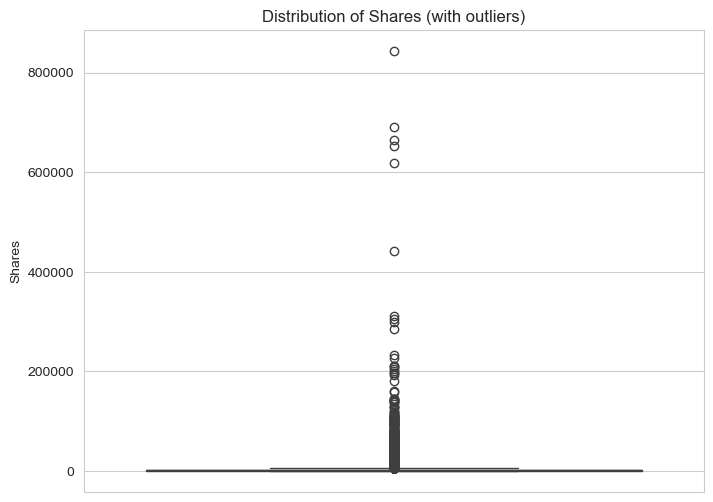

In [15]:
# y 왜도 계산 및 이상치 파악 (전체)
skewness = y.skew()
print(f'Skewness of y: {skewness:.4f}')
      
plt.figure(figsize=(8, 6))
sns.boxplot(y=y)
plt.title('Distribution of Shares (with outliers)')
plt.ylabel('Shares')
plt.show()


=== X feature skewness ===
n_non_stop_words                 198.792445
n_unique_tokens                  198.655116
n_non_stop_unique_tokens         198.443294
kw_max_min                        35.328434
kw_avg_min                        31.306108
self_reference_min_shares         26.264364
self_reference_avg_sharess        17.914093
kw_max_avg                        16.411670
self_reference_max_shares         13.870849
kw_min_max                        10.386372
num_videos                         7.019533
kw_avg_avg                         5.760177
num_self_hrefs                     5.172751
num_hrefs                          4.013495
data_channel_is_lifestyle          3.993019
num_imgs                           3.946596
data_channel_is_socmed             3.758880
weekday_is_saturday                3.637086
weekday_is_sunday                  3.399927
min_positive_polarity              3.040468
n_tokens_content                   2.945422
kw_min_min                         2.374947
is_w

/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_27609/3812532366.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skewness.values, y=skewness.index, palette='viridis')


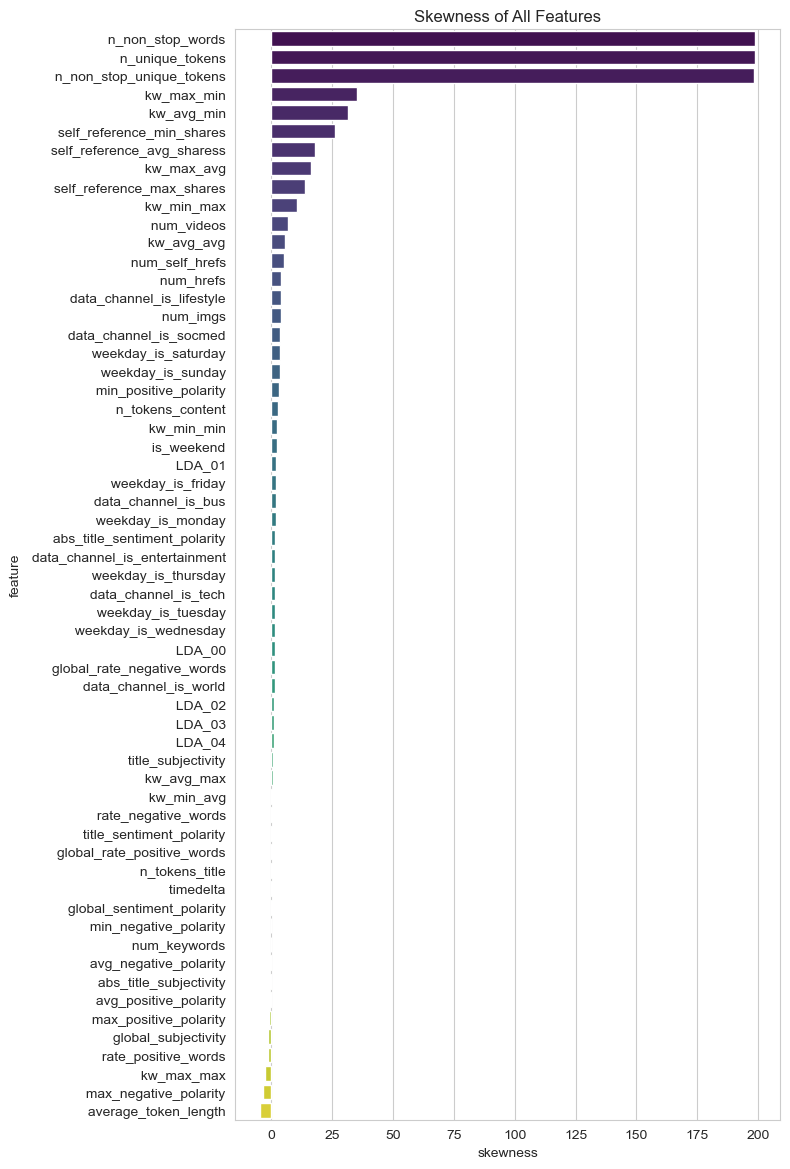

In [16]:
# X 모든 특성의 왜도 계산 및 시각화 (전체)
skewness = X.skew().sort_values(ascending=False)
print("\n=== X feature skewness ===")
print(skewness)
plt.figure(figsize=(8, len(skewness)*0.2))
sns.barplot(x=skewness.values, y=skewness.index, palette='viridis')
plt.title('Skewness of All Features')
plt.xlabel('skewness')
plt.ylabel('feature')
plt.tight_layout()
plt.show()

In [17]:
# 피처와 타켓 사이의 상관관계
corrs = X.apply(lambda col: y.corr(col))
corrs_abs = corrs.abs().sort_values(ascending=False)

corrs_abs.head(10)

kw_avg_avg                    0.110413
LDA_03                        0.083771
kw_max_avg                    0.064306
LDA_02                        0.059163
self_reference_avg_sharess    0.057789
self_reference_min_shares     0.055958
data_channel_is_world         0.049497
self_reference_max_shares     0.047115
num_hrefs                     0.045404
kw_avg_max                    0.044686
dtype: float64

---

### 피처 엔지니어링

In [3]:
from sklearn.impute import SimpleImputer

# 분할된 각각의 세트에 동일한 피처 엔지니어링 함수 정의
def engineer_features(df):
    df = df.copy()
    skews = df.skew().abs()
    high_skew = skews[skews > 1].index

    new_cols = {}

    # 2-1) 고왜도 컬럼 찾아서 √, ³√ 추가 (음수는 0으로 처리)
    for col in high_skew:
        col_data = df[col].astype(float).values
        with np.errstate(invalid='ignore'):
            sqrt_vals = np.where(col_data >= 0, np.sqrt(col_data), 0.0)
            cbrt_vals = np.where(col_data >= 0, np.cbrt(col_data), 0.0)
        new_cols[f"{col}_sqrt"] = sqrt_vals
        new_cols[f"{col}_cbrt"] = cbrt_vals

    # 2-2) 상위 5개 왜도 컬럼 간 곱셈·나눗셈 항 추가
    top5 = list(high_skew.sort_values(ascending=False)[:5])
    for i, a in enumerate(top5):
        for b in top5[i+1:]:
            mul = df[a] * df[b]
            div = np.divide(df[a], df[b], out=np.zeros_like(df[a]), where=df[b]!=0)

            finite_mul = mul[np.isfinite(mul)]
            low_mul, high_mul = np.percentile(finite_mul, [0.1, 99.9])
            finite_div = div[np.isfinite(div)]
            low_div, high_div = np.percentile(finite_div, [0.1, 99.9])

            new_cols[f"{a}_x_{b}"]   = np.clip(mul, low_mul, high_mul)
            new_cols[f"{a}_div_{b}"] = np.clip(div, low_div, high_div)

    fe_df = pd.DataFrame(new_cols, index=df.index)
    return pd.concat([df, fe_df], axis=1)


# FE 미적용 DataFrame (Before)
X_train_df = X_train.copy()
X_valid_df = X_valid.copy()
X_test_df  = X_test.copy()

# FE 적용한 데이터프레임 (After)
imputer = SimpleImputer(strategy='median')  # 결측치 대체 — 중앙값으로

X_train_fe = pd.DataFrame(
    imputer.fit_transform(engineer_features(X_train)),
    columns=engineer_features(X_train).columns,
    index=X_train.index
)
X_valid_fe = pd.DataFrame(
    imputer.transform(engineer_features(X_valid)),
    columns=engineer_features(X_train).columns,
    index=X_valid.index
)
X_test_fe = pd.DataFrame(
    imputer.transform(engineer_features(X_test)),
    columns=engineer_features(X_train).columns,
    index=X_test.index
)

/opt/homebrew/anaconda3/lib/python3.12/site-packages/pandas/core/series.py:1031: RuntimeWarning: invalid value encountered in cast
  arr = np.asarray(values, dtype=dtype)
/opt/homebrew/anaconda3/lib/python3.12/site-packages/pandas/core/series.py:1031: RuntimeWarning: invalid value encountered in cast
  arr = np.asarray(values, dtype=dtype)
/opt/homebrew/anaconda3/lib/python3.12/site-packages/pandas/core/series.py:1031: RuntimeWarning: invalid value encountered in cast
  arr = np.asarray(values, dtype=dtype)
/opt/homebrew/anaconda3/lib/python3.12/site-packages/pandas/core/series.py:1031: RuntimeWarning: invalid value encountered in cast
  arr = np.asarray(values, dtype=dtype)
/opt/homebrew/anaconda3/lib/python3.12/site-packages/pandas/core/series.py:1031: RuntimeWarning: invalid value encountered in cast
  arr = np.asarray(values, dtype=dtype)
/opt/homebrew/anaconda3/lib/python3.12/site-packages/pandas/core/series.py:1031: RuntimeWarning: invalid value encountered in cast
  arr = np.asa

### OutlierRemover + build_pipeline

In [4]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer, QuantileTransformer, PowerTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline

class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, use_iqr=False, remove_pct=None):
        self.use_iqr, self.remove_pct = use_iqr, remove_pct
    def fit(self, X, y):
        yc = np.asarray(y)
        if self.use_iqr:
            Q1,Q3 = np.percentile(yc,[25,75])
            self.mask_ = (yc>=Q1-1.5*(Q3-Q1)) & (yc<=Q3+1.5*(Q3-Q1))
        elif self.remove_pct is not None:
            thresh = np.percentile(yc, self.remove_pct*100)
            self.mask_ = yc<=thresh
        else:
            self.mask_ = np.ones(len(yc),dtype=bool)
        return self
    def transform(self, X):
        return X.iloc[self.mask_].reset_index(drop=True)
    def filter_y(self, y):
        return y.iloc[self.mask_].reset_index(drop=True)

def build_pipeline(with_fe,
                   use_iqr, remove_pct,
                   use_log, use_qt, use_pt,
                   model):
    steps = []
    if with_fe:
        steps.append(('fe', FunctionTransformer(engineer_features, validate=False)))
    steps.append(('outlier', OutlierRemover(use_iqr, remove_pct)))
    if use_log: steps.append(('log_x', FunctionTransformer(np.log1p, validate=False)))
    if use_qt:  steps.append(('qt', QuantileTransformer(output_distribution='uniform', random_state=42)))
    if use_pt:  steps.append(('pt', PowerTransformer(method='yeo-johnson')))
    if use_log:
        model = TransformedTargetRegressor(regressor=model,
                                           func=np.log1p,
                                           inverse_func=np.expm1)
    steps.append(('model', model))
    return Pipeline(steps)

---

### 모델 + 이상치제거, x,y 로그변환, QuantileTransformer, PowerTransformer 조합 분석

In [32]:
from sklearn.base import clone
from tqdm.notebook import tqdm        
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import (
    RandomForestRegressor,
    ExtraTreesRegressor,
    GradientBoostingRegressor,
    HistGradientBoostingRegressor,
)

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.pipeline import Pipeline, FunctionTransformer
from sklearn.preprocessing import QuantileTransformer

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# 1. 전처리·평가 함수 + 일괄 실행 (clone, tqdm 블록)
def preprocess_and_eval(model, X_tr, y_tr, X_te, y_te,
                        with_fe=False,
                        remove_pct=None, use_iqr=False,
                        use_log=False, use_qt=False, use_pt=False):
   
    # 0) FE 적용 여부
    if with_fe:
        Xc, yc = engineer_features(X_tr).copy(), y_tr.copy()
        Xte     = engineer_features(X_te).copy()
        # 결측치 처리
        Xc  = pd.DataFrame(imputer.transform(Xc), columns=Xc.columns, index=Xc.index)
        Xte = pd.DataFrame(imputer.transform(Xte), columns=Xc.columns, index=Xte.index)
    else:
        Xc, yc = X_tr.copy(), y_tr.copy()
        Xte    = X_te.copy()

    # 1) 이상치 제거
    if use_iqr:
        Q1, Q3 = np.percentile(yc, [25,75])
        mask   = (yc >= Q1-1.5*(Q3-Q1)) & (yc <= Q3+1.5*(Q3-Q1))
    elif remove_pct is not None:
        thresh = np.percentile(yc, remove_pct*100)
        mask   = yc <= thresh
    else:
        mask   = np.ones(len(yc), dtype=bool)
    Xc, yc = Xc[mask], yc[mask]

    # 2) 로그 변환
    if use_log:
        yc = np.log1p(yc)
        skew_cols = Xc.columns[(Xc.skew().abs()>1)&(Xc.min()>=0)]
        Xc[skew_cols]  = np.log1p(Xc[skew_cols])
        Xte[skew_cols] = np.log1p(Xte[skew_cols])

    # 3) Pipeline (clean→clip→QT→PT)
    clean_inf = FunctionTransformer(lambda X: np.nan_to_num(X, 0.0,0.0,0.0), validate=False)
    clip_vals = FunctionTransformer(lambda X: np.clip(X,-1e6,1e6), validate=False)
    steps = [('clean1', clean_inf), ('clip1', clip_vals)]
    if use_qt:
        steps += [
            ('qt', QuantileTransformer(output_distribution='uniform',
                                      n_quantiles=min(1000, Xc.shape[0]),
                                      random_state=42)),
            ('clean2', clean_inf), ('clip2', clip_vals)
        ]
    if use_pt:
        steps += [
            ('pt', PowerTransformer(method='yeo-johnson')),
            ('clean3', clean_inf), ('clip3', clip_vals)
        ]
    pipe = Pipeline(steps)

    Xc_p  = pipe.fit_transform(Xc)
    Xte_p = pipe.transform(Xte)

    clf = clone(model)
    clf.fit(Xc_p, yc)
    y_pred = clf.predict(Xte_p)
    if use_log:
        y_pred = np.expm1(y_pred)

    return mean_squared_error(y_te, y_pred), mean_absolute_error(y_te, y_pred)


# 2. 실행할 모델 정의
models = {
    'LinearRegression': LinearRegression(n_jobs=-1),
    'Ridge': Ridge(random_state=42),
    'Lasso': Lasso(random_state=42),
    # 'KNeighbors': KNeighborsRegressor(),
    # 'DecisionTree': DecisionTreeRegressor(random_state=42),
    'ExtraTrees': ExtraTreesRegressor(n_estimators=50, random_state=42, n_jobs=-1),
    'RandomForest': RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1),
    # 'AdaBoost': AdaBoostRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'HistGradientBoosting': HistGradientBoostingRegressor(random_state=42),
    'XGBRegressor': XGBRegressor(random_state=42, verbosity=0, n_jobs=-1),
    'LGBMRegressor': LGBMRegressor(random_state=42, n_jobs=-1),
    'CatBoostRegressor': CatBoostRegressor(random_state=42, thread_count=-1, verbose=100)
}

# 3. 전처리 조합 리스트 (use_log: x+y 로그 변환, use_qt: QuantileTransformer, use_pt: PowerTransformer)
combos = []
for with_fe in [False, True]:
    for use_iqr in [False, True]:
        remove_options = [None] if use_iqr else [None, 0.99, 0.995]
        for remove_pct in remove_options:
            for use_log in [False, True]:
                for use_qt in [False, True]:
                    for use_pt in [False, True]:
                        name = (
                            ("FE+" if with_fe else "RAW+") +
                            ("iqr+" if use_iqr else "") +
                            (f"rm{(1-remove_pct)*100:.1f}%+" if remove_pct else "") +
                            ("log+" if use_log else "") +
                            ("PT+" if use_pt else "") +
                            ("QT"  if use_qt else "")
                        ).rstrip('+')
                        combos.append({
                            'name':       name or 'raw',
                            'with_fe':    with_fe,
                            'use_iqr':    use_iqr,
                            'remove_pct': remove_pct,
                            'use_log':    use_log,
                            'use_qt':     use_qt,
                            'use_pt':     use_pt,
                        })

# 4. 평가 루프에서도 with_fe 플래그 전달
results = []
for model_name, model in models.items():
    print(f"\n=== {model_name} ===")
    best_mae = float('inf')
    best_combo = None
    
    pbar = tqdm(combos, desc=model_name, unit="combo")
    for combo in pbar:
        mse, mae = preprocess_and_eval(
            model,
            X_train_df, y_train,
            X_valid_df, y_valid,
            with_fe   = combo['with_fe'],
            remove_pct= combo['remove_pct'],
            use_iqr   = combo['use_iqr'],
            use_log   = combo['use_log'],
            use_qt    = combo['use_qt'],
            use_pt    = combo['use_pt']
        )
        print(f"{combo['name']:30s} → MSE: {mse:.4e}, MAE: {mae:.4f}")
        results.append({
            'model': model_name,
            'combo': combo['name'],
            'MSE':   mse,
            'MAE':   mae
        })

        if mae < best_mae:
            best_mae = mae
            best_combo = combo['name']

        pbar.set_postfix({
            'Best MAE': f"{best_mae:.2f}",
            'Combo': best_combo
        })

df = pd.DataFrame(results).sort_values('MAE')
print(df.to_string(index=False))


=== LinearRegression ===


LinearRegression:   0%|          | 0/64 [00:00<?, ?combo/s]

RAW                            → MSE: 8.3666e+07, MAE: 3009.8497
RAW+PT                         → MSE: 8.3342e+07, MAE: 3074.8059
RAW+QT                         → MSE: 8.2782e+07, MAE: 3047.8622
RAW+PT+QT                      → MSE: 8.2762e+07, MAE: 3050.9291
RAW+log                        → MSE: 8.5344e+07, MAE: 2274.3329
RAW+log+PT                     → MSE: 8.5325e+07, MAE: 2275.9337
RAW+log+QT                     → MSE: 8.5145e+07, MAE: 2277.1406
RAW+log+PT+QT                  → MSE: 8.5164e+07, MAE: 2274.0173
RAW+rm1.0%                     → MSE: 8.3123e+07, MAE: 2567.3039
RAW+rm1.0%+PT                  → MSE: 8.2997e+07, MAE: 2568.0219
RAW+rm1.0%+QT                  → MSE: 8.2755e+07, MAE: 2548.2002
RAW+rm1.0%+PT+QT               → MSE: 8.2743e+07, MAE: 2548.9603
RAW+rm1.0%+log                 → MSE: 8.5711e+07, MAE: 2261.8012
RAW+rm1.0%+log+PT              → MSE: 8.5631e+07, MAE: 2261.0283
RAW+rm1.0%+log+QT              → MSE: 8.5477e+07, MAE: 2253.5415
RAW+rm1.0%+log+PT+QT     

Ridge:   0%|          | 0/64 [00:00<?, ?combo/s]

RAW                            → MSE: 8.3653e+07, MAE: 3006.9122
RAW+PT                         → MSE: 8.3072e+07, MAE: 3039.9475
RAW+QT                         → MSE: 8.2775e+07, MAE: 3047.3724
RAW+PT+QT                      → MSE: 8.2758e+07, MAE: 3050.3513
RAW+log                        → MSE: 8.5339e+07, MAE: 2274.0485
RAW+log+PT                     → MSE: 8.5290e+07, MAE: 2275.0329
RAW+log+QT                     → MSE: 8.5108e+07, MAE: 2268.5100
RAW+log+PT+QT                  → MSE: 8.5092e+07, MAE: 2268.0510
RAW+rm1.0%                     → MSE: 8.3133e+07, MAE: 2567.2971
RAW+rm1.0%+PT                  → MSE: 8.2907e+07, MAE: 2557.1394
RAW+rm1.0%+QT                  → MSE: 8.2744e+07, MAE: 2547.4288
RAW+rm1.0%+PT+QT               → MSE: 8.2738e+07, MAE: 2548.6077
RAW+rm1.0%+log                 → MSE: 8.5711e+07, MAE: 2261.7776
RAW+rm1.0%+log+PT              → MSE: 8.5631e+07, MAE: 2260.9907
RAW+rm1.0%+log+QT              → MSE: 8.5479e+07, MAE: 2253.5609
RAW+rm1.0%+log+PT+QT     

Lasso:   0%|          | 0/64 [00:00<?, ?combo/s]

/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.677e+12, tolerance: 3.516e+08
  model = cd_fast.enet_coordinate_descent(


RAW                            → MSE: 8.3692e+07, MAE: 2998.3292
RAW+PT                         → MSE: 8.3051e+07, MAE: 3039.0663
RAW+QT                         → MSE: 8.2732e+07, MAE: 3041.0364


/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.976e+08, tolerance: 3.516e+08
  model = cd_fast.enet_coordinate_descent(


RAW+PT+QT                      → MSE: 8.2739e+07, MAE: 3047.7592
RAW+log                        → MSE: 8.6581e+07, MAE: 2353.7076
RAW+log+PT                     → MSE: 8.6832e+07, MAE: 2365.2822
RAW+log+QT                     → MSE: 8.6832e+07, MAE: 2365.2822
RAW+log+PT+QT                  → MSE: 8.6832e+07, MAE: 2365.2822
RAW+rm1.0%                     → MSE: 8.3160e+07, MAE: 2567.2985
RAW+rm1.0%+PT                  → MSE: 8.2907e+07, MAE: 2557.5928
RAW+rm1.0%+QT                  → MSE: 8.2764e+07, MAE: 2547.2573
RAW+rm1.0%+PT+QT               → MSE: 8.2749e+07, MAE: 2548.6763
RAW+rm1.0%+log                 → MSE: 8.6801e+07, MAE: 2340.9675
RAW+rm1.0%+log+PT              → MSE: 8.7023e+07, MAE: 2352.5629
RAW+rm1.0%+log+QT              → MSE: 8.7023e+07, MAE: 2352.5629
RAW+rm1.0%+log+PT+QT           → MSE: 8.7023e+07, MAE: 2352.5629
RAW+rm0.5%                     → MSE: 8.2721e+07, MAE: 2659.9745
RAW+rm0.5%+PT                  → MSE: 8.2497e+07, MAE: 2654.6233
RAW+rm0.5%+QT            

/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.698e+12, tolerance: 3.516e+08
  model = cd_fast.enet_coordinate_descent(


FE                             → MSE: 8.3296e+07, MAE: 3012.9594


/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.297e+11, tolerance: 3.516e+08
  model = cd_fast.enet_coordinate_descent(


FE+PT                          → MSE: 8.3069e+07, MAE: 3044.7871
FE+QT                          → MSE: 8.2732e+07, MAE: 3040.9612
FE+PT+QT                       → MSE: 8.2739e+07, MAE: 3047.7502
FE+log                         → MSE: 8.6581e+07, MAE: 2353.7076
FE+log+PT                      → MSE: 8.6832e+07, MAE: 2365.2822
FE+log+QT                      → MSE: 8.6832e+07, MAE: 2365.2822
FE+log+PT+QT                   → MSE: 8.6832e+07, MAE: 2365.2822


/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.451e+11, tolerance: 3.173e+07
  model = cd_fast.enet_coordinate_descent(


FE+rm1.0%                      → MSE: 8.2609e+07, MAE: 2531.7605


/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.254e+10, tolerance: 3.173e+07
  model = cd_fast.enet_coordinate_descent(


FE+rm1.0%+PT                   → MSE: 8.2810e+07, MAE: 2550.3806
FE+rm1.0%+QT                   → MSE: 8.2764e+07, MAE: 2547.2544
FE+rm1.0%+PT+QT                → MSE: 8.2749e+07, MAE: 2548.6631
FE+rm1.0%+log                  → MSE: 8.6801e+07, MAE: 2340.9675
FE+rm1.0%+log+PT               → MSE: 8.7023e+07, MAE: 2352.5629
FE+rm1.0%+log+QT               → MSE: 8.7023e+07, MAE: 2352.5629
FE+rm1.0%+log+PT+QT            → MSE: 8.7023e+07, MAE: 2352.5629


/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.333e+11, tolerance: 5.059e+07
  model = cd_fast.enet_coordinate_descent(


FE+rm0.5%                      → MSE: 8.2142e+07, MAE: 2626.3209


/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.051e+10, tolerance: 5.059e+07
  model = cd_fast.enet_coordinate_descent(


FE+rm0.5%+PT                   → MSE: 8.2411e+07, MAE: 2648.3655
FE+rm0.5%+QT                   → MSE: 8.2284e+07, MAE: 2642.0698
FE+rm0.5%+PT+QT                → MSE: 8.2253e+07, MAE: 2642.6727
FE+rm0.5%+log                  → MSE: 8.6690e+07, MAE: 2346.3218
FE+rm0.5%+log+PT               → MSE: 8.6936e+07, MAE: 2358.3174
FE+rm0.5%+log+QT               → MSE: 8.6936e+07, MAE: 2358.3174
FE+rm0.5%+log+PT+QT            → MSE: 8.6936e+07, MAE: 2358.3174


/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.128e+10, tolerance: 2.586e+06
  model = cd_fast.enet_coordinate_descent(


FE+iqr                         → MSE: 8.6304e+07, MAE: 2252.1945


/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.439e+08, tolerance: 2.586e+06
  model = cd_fast.enet_coordinate_descent(


FE+iqr+PT                      → MSE: 8.6441e+07, MAE: 2263.5722
FE+iqr+QT                      → MSE: 8.6407e+07, MAE: 2259.1586
FE+iqr+PT+QT                   → MSE: 8.6384e+07, MAE: 2256.7529
FE+iqr+log                     → MSE: 8.8033e+07, MAE: 2316.4972
FE+iqr+log+PT                  → MSE: 8.8136e+07, MAE: 2324.6566
FE+iqr+log+QT                  → MSE: 8.8136e+07, MAE: 2324.6566
FE+iqr+log+PT+QT               → MSE: 8.8136e+07, MAE: 2324.6566

=== ExtraTrees ===


ExtraTrees:   0%|          | 0/64 [00:00<?, ?combo/s]

RAW                            → MSE: 9.0222e+07, MAE: 3293.7538
RAW+PT                         → MSE: 9.2271e+07, MAE: 3372.2592
RAW+QT                         → MSE: 9.3790e+07, MAE: 3482.1168
RAW+PT+QT                      → MSE: 9.0828e+07, MAE: 3422.6928
RAW+log                        → MSE: 8.4569e+07, MAE: 2285.5195
RAW+log+PT                     → MSE: 8.4581e+07, MAE: 2288.9509
RAW+log+QT                     → MSE: 8.4488e+07, MAE: 2286.9074
RAW+log+PT+QT                  → MSE: 8.4435e+07, MAE: 2283.6019
RAW+rm1.0%                     → MSE: 8.2473e+07, MAE: 2689.3765
RAW+rm1.0%+PT                  → MSE: 8.2661e+07, MAE: 2705.9799
RAW+rm1.0%+QT                  → MSE: 8.2466e+07, MAE: 2716.4334
RAW+rm1.0%+PT+QT               → MSE: 8.2273e+07, MAE: 2711.7442
RAW+rm1.0%+log                 → MSE: 8.5029e+07, MAE: 2257.6236
RAW+rm1.0%+log+PT              → MSE: 8.5057e+07, MAE: 2258.4991
RAW+rm1.0%+log+QT              → MSE: 8.4982e+07, MAE: 2263.0947
RAW+rm1.0%+log+PT+QT     

RandomForest:   0%|          | 0/64 [00:00<?, ?combo/s]

RAW                            → MSE: 9.9744e+07, MAE: 3371.6719
RAW+PT                         → MSE: 9.6383e+07, MAE: 3352.2287
RAW+QT                         → MSE: 1.0211e+08, MAE: 3438.9744
RAW+PT+QT                      → MSE: 9.8032e+07, MAE: 3413.2857
RAW+log                        → MSE: 8.4638e+07, MAE: 2289.1579
RAW+log+PT                     → MSE: 8.4637e+07, MAE: 2292.8618
RAW+log+QT                     → MSE: 8.4558e+07, MAE: 2289.0619
RAW+log+PT+QT                  → MSE: 8.4661e+07, MAE: 2293.1195
RAW+rm1.0%                     → MSE: 8.3057e+07, MAE: 2707.4759
RAW+rm1.0%+PT                  → MSE: 8.3165e+07, MAE: 2711.1175
RAW+rm1.0%+QT                  → MSE: 8.3282e+07, MAE: 2717.1846
RAW+rm1.0%+PT+QT               → MSE: 8.3364e+07, MAE: 2713.9377
RAW+rm1.0%+log                 → MSE: 8.5153e+07, MAE: 2262.3884
RAW+rm1.0%+log+PT              → MSE: 8.5087e+07, MAE: 2263.3140
RAW+rm1.0%+log+QT              → MSE: 8.5126e+07, MAE: 2265.1550
RAW+rm1.0%+log+PT+QT     

GradientBoosting:   0%|          | 0/64 [00:00<?, ?combo/s]

RAW                            → MSE: 1.0128e+08, MAE: 3016.2161
RAW+PT                         → MSE: 1.0226e+08, MAE: 3025.1886
RAW+QT                         → MSE: 1.0551e+08, MAE: 3037.4253
RAW+PT+QT                      → MSE: 1.0511e+08, MAE: 3031.1126
RAW+log                        → MSE: 8.4789e+07, MAE: 2252.8423
RAW+log+PT                     → MSE: 8.4788e+07, MAE: 2252.9980
RAW+log+QT                     → MSE: 8.4793e+07, MAE: 2253.9463
RAW+log+PT+QT                  → MSE: 8.4793e+07, MAE: 2253.9870
RAW+rm1.0%                     → MSE: 8.2544e+07, MAE: 2535.1030
RAW+rm1.0%+PT                  → MSE: 8.2623e+07, MAE: 2539.6545
RAW+rm1.0%+QT                  → MSE: 8.2577e+07, MAE: 2537.5067
RAW+rm1.0%+PT+QT               → MSE: 8.2574e+07, MAE: 2537.4181
RAW+rm1.0%+log                 → MSE: 8.5265e+07, MAE: 2236.7996
RAW+rm1.0%+log+PT              → MSE: 8.5284e+07, MAE: 2238.6175
RAW+rm1.0%+log+QT              → MSE: 8.5279e+07, MAE: 2237.7106
RAW+rm1.0%+log+PT+QT     

HistGradientBoosting:   0%|          | 0/64 [00:00<?, ?combo/s]

RAW                            → MSE: 8.6179e+07, MAE: 3067.8201
RAW+PT                         → MSE: 8.6179e+07, MAE: 3067.8201
RAW+QT                         → MSE: 8.6179e+07, MAE: 3067.8201
RAW+PT+QT                      → MSE: 8.6179e+07, MAE: 3067.8201
RAW+log                        → MSE: 8.4797e+07, MAE: 2252.7555
RAW+log+PT                     → MSE: 8.4797e+07, MAE: 2252.7555
RAW+log+QT                     → MSE: 8.4797e+07, MAE: 2252.7555
RAW+log+PT+QT                  → MSE: 8.4797e+07, MAE: 2252.7555
RAW+rm1.0%                     → MSE: 8.2478e+07, MAE: 2530.2860
RAW+rm1.0%+PT                  → MSE: 8.2478e+07, MAE: 2530.3174
RAW+rm1.0%+QT                  → MSE: 8.2478e+07, MAE: 2530.2860
RAW+rm1.0%+PT+QT               → MSE: 8.2478e+07, MAE: 2530.2860
RAW+rm1.0%+log                 → MSE: 8.5137e+07, MAE: 2236.7652
RAW+rm1.0%+log+PT              → MSE: 8.5137e+07, MAE: 2236.7652
RAW+rm1.0%+log+QT              → MSE: 8.5137e+07, MAE: 2236.7652
RAW+rm1.0%+log+PT+QT     

XGBRegressor:   0%|          | 0/64 [00:00<?, ?combo/s]

RAW                            → MSE: 1.0884e+08, MAE: 3492.1373
RAW+PT                         → MSE: 1.0801e+08, MAE: 3433.5014
RAW+QT                         → MSE: 1.1312e+08, MAE: 3477.3702
RAW+PT+QT                      → MSE: 1.1225e+08, MAE: 3477.7517
RAW+log                        → MSE: 8.4254e+07, MAE: 2316.1633
RAW+log+PT                     → MSE: 8.4740e+07, MAE: 2335.3029
RAW+log+QT                     → MSE: 8.4803e+07, MAE: 2338.4209
RAW+log+PT+QT                  → MSE: 8.4961e+07, MAE: 2328.1060
RAW+rm1.0%                     → MSE: 8.3257e+07, MAE: 2642.5263
RAW+rm1.0%+PT                  → MSE: 8.3307e+07, MAE: 2643.9686
RAW+rm1.0%+QT                  → MSE: 8.3268e+07, MAE: 2648.8373
RAW+rm1.0%+PT+QT               → MSE: 8.3343e+07, MAE: 2648.4691
RAW+rm1.0%+log                 → MSE: 8.4977e+07, MAE: 2288.6550
RAW+rm1.0%+log+PT              → MSE: 8.5084e+07, MAE: 2288.8438
RAW+rm1.0%+log+QT              → MSE: 8.4923e+07, MAE: 2294.3821
RAW+rm1.0%+log+PT+QT     

LGBMRegressor:   0%|          | 0/64 [00:00<?, ?combo/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001554 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8444
[LightGBM] [Info] Number of data points in the train set: 23786, number of used features: 59
[LightGBM] [Info] Start training from score 3448.969436
RAW                            → MSE: 9.1694e+07, MAE: 3224.9529
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001757 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8450
[LightGBM] [Info] Number of data points in the train set: 23786, number of used features: 59
[LightGBM] [Info] Start training from score 3448.969436
RAW+PT                         → MSE: 9.0879e+07, MAE: 3197.0677
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001401 seconds.
You can set 

CatBoostRegressor:   0%|          | 0/64 [00:00<?, ?combo/s]

Learning rate set to 0.067552
0:	learn: 12121.6467868	total: 58.8ms	remaining: 58.7s
100:	learn: 10008.2828162	total: 224ms	remaining: 2s
200:	learn: 9060.7004769	total: 382ms	remaining: 1.52s
300:	learn: 8309.6078565	total: 590ms	remaining: 1.37s
400:	learn: 7816.9358167	total: 773ms	remaining: 1.15s
500:	learn: 7365.1693898	total: 930ms	remaining: 926ms
600:	learn: 6986.8403074	total: 1.09s	remaining: 723ms
700:	learn: 6668.3717443	total: 1.25s	remaining: 533ms
800:	learn: 6321.9909242	total: 1.41s	remaining: 351ms
900:	learn: 6060.4359471	total: 1.57s	remaining: 172ms
999:	learn: 5814.7127916	total: 1.72s	remaining: 0us
RAW                            → MSE: 9.3060e+07, MAE: 3105.4236
Learning rate set to 0.067552
0:	learn: 12121.6467868	total: 3.31ms	remaining: 3.3s
100:	learn: 9986.4925151	total: 170ms	remaining: 1.51s
200:	learn: 9046.1456003	total: 332ms	remaining: 1.32s
300:	learn: 8323.3704560	total: 487ms	remaining: 1.13s
400:	learn: 7738.3972048	total: 672ms	remaining: 1s
500

In [33]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df

model                 combo           MSE          MAE
637     CatBoostRegressor         FE+iqr+log+PT  8.711879e+07  2217.850198
607     CatBoostRegressor     RAW+iqr+log+PT+QT  8.713525e+07  2218.320475
605     CatBoostRegressor        RAW+iqr+log+PT  8.713351e+07  2218.463792
606     CatBoostRegressor        RAW+iqr+log+QT  8.710453e+07  2218.484432
638     CatBoostRegressor         FE+iqr+log+QT  8.714067e+07  2218.726705
639     CatBoostRegressor      FE+iqr+log+PT+QT  8.714690e+07  2218.973779
604     CatBoostRegressor           RAW+iqr+log  8.709107e+07  2220.334731
636     CatBoostRegressor            FE+iqr+log  8.713398e+07  2220.544858
575         LGBMRegressor      FE+iqr+log+PT+QT  8.721310e+07  2222.907416
542         LGBMRegressor        RAW+iqr+log+QT  8.719423e+07  2223.185732
574         LGBMRegressor         FE+iqr+log+QT  8.720528e+07  2223.824443
573         LGBMRegressor         FE+iqr+log+PT  8.722221e+07  2223.848380
541         LGBMRegressor        RAW+iqr+log+PT  8.722891e+07  2224.079850
543         LGBMRegressor     RAW+iqr+log+PT+QT  8.721858e+07  2224.195172
572         LGBMRegressor            FE+iqr+log  8.722718e+07  2224.530460
540         LGBMRegressor           RAW+iqr+log  8.720067e+07  2224.540278
446  HistGradientBoosting         FE+iqr+log+QT  8.727204e+07  2227.186498
412  HistGradientBoosting           RAW+iqr+log  8.727204e+07  2227.186498
444  HistGradientBoosting            FE+iqr+log  8.727204e+07  2227.186498
414  HistGradientBoosting        RAW+iqr+log+QT  8.727204e+07  2227.186498
447  HistGradientBoosting      FE+iqr+log+PT+QT  8.727204e+07  2227.187397
415  HistGradientBoosting     RAW+iqr+log+PT+QT  8.727204e+07  2227.187397
413  HistGradientBoosting        RAW+iqr+log+PT  8.727204e+07  2227.187397
445  HistGradientBoosting         FE+iqr+log+PT  8.727204e+07  2227.187397
349      GradientBoosting        RAW+iqr+log+PT  8.727572e+07  2230.321192
382      GradientBoosting         FE+iqr+log+QT  8.728279e+07  2230.467995
350      GradientBoosting        RAW+iqr+log+QT  8.728310e+07  2230.474337
351      GradientBoosting     RAW+iqr+log+PT+QT  8.728312e+07  2230.481684
383      GradientBoosting      FE+iqr+log+PT+QT  8.728284e+07  2230.483613
381      GradientBoosting         FE+iqr+log+PT  8.728736e+07  2230.758000
380      GradientBoosting            FE+iqr+log  8.729156e+07  2230.941403
622     CatBoostRegressor      FE+rm1.0%+log+QT  8.504225e+07  2231.234967
524         LGBMRegressor        RAW+rm1.0%+log  8.515618e+07  2231.263828
348      GradientBoosting           RAW+iqr+log  8.728987e+07  2231.272517
61       LinearRegression         FE+iqr+log+PT  8.723920e+07  2231.672971
621     CatBoostRegressor      FE+rm1.0%+log+PT  8.501966e+07  2231.716289
589     CatBoostRegressor     RAW+rm1.0%+log+PT  8.494078e+07  2232.407982
556         LGBMRegressor         FE+rm1.0%+log  8.508870e+07  2232.940943
221            ExtraTrees        RAW+iqr+log+PT  8.723321e+07  2232.993501
600     CatBoostRegressor               RAW+iqr  8.616529e+07  2233.049155
252            ExtraTrees            FE+iqr+log  8.716000e+07  2233.168876
588     CatBoostRegressor        RAW+rm1.0%+log  8.500851e+07  2233.266181
558         LGBMRegressor      FE+rm1.0%+log+QT  8.509470e+07  2233.347038
559         LGBMRegressor   FE+rm1.0%+log+PT+QT  8.511535e+07  2233.379655
590     CatBoostRegressor     RAW+rm1.0%+log+QT  8.504638e+07  2233.394123
526         LGBMRegressor     RAW+rm1.0%+log+QT  8.510280e+07  2233.551130
557         LGBMRegressor      FE+rm1.0%+log+PT  8.508365e+07  2233.583082
623     CatBoostRegressor   FE+rm1.0%+log+PT+QT  8.505482e+07  2233.913470
620     CatBoostRegressor         FE+rm1.0%+log  8.498374e+07  2233.920945
220            ExtraTrees           RAW+iqr+log  8.721649e+07  2234.038961
254            ExtraTrees         FE+iqr+log+QT  8.718346e+07  2234.537070
255            ExtraTrees      FE+iqr+log+PT+QT  8.727072e+07  2234.537755
635     CatBoostRegressor          FE+iqr+PT+

/var/folders/_2/7d52k4j5451f0ytscvrz28k40000gn/T/ipykernel_98188/3579549580.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


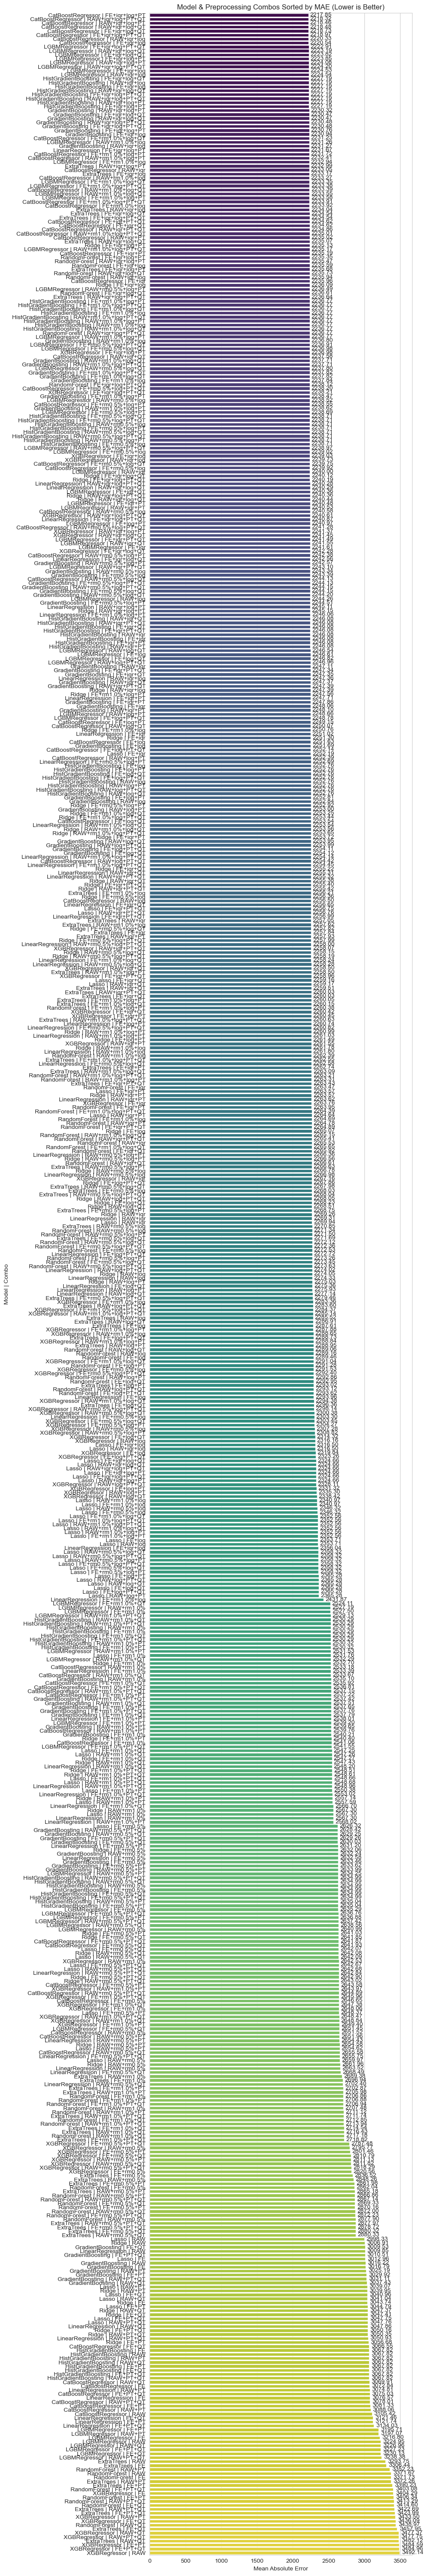

In [34]:
# 시각화
plt.figure(figsize=(10, 60))
ax = sns.barplot(
    x='MAE',
    y=df['model'] + ' | ' + df['combo'],
    data=df,
    palette='viridis'
)
plt.title('Model & Preprocessing Combos Sorted by MAE (Lower is Better)')
plt.xlabel('Mean Absolute Error')
plt.ylabel('Model | Combo')
for p in ax.patches:
    width = p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.text(width + 0.01 * width, y, f"{width:.2f}", va='center')
plt.tight_layout()
plt.show()

---

### 하이퍼파라미터 튜닝

In [23]:
def build_pipeline_no_outlier(with_fe, use_log, use_qt, use_pt, model):
   
    steps = []
    # (1) FE 적용 옵션
    if with_fe:
        steps.append(('fe', FunctionTransformer(engineer_features, validate=False)))

    # (2) 맨 처음: Inf/NaN 제거 및 과도치 clipping
    steps.append(('clean1', FunctionTransformer(lambda X: np.nan_to_num(X, 0.0, 0.0, 0.0), validate=False)))
    steps.append(('clip1',  FunctionTransformer(lambda X: np.clip(X, -1e6, 1e6), validate=False)))

    # (3) x 로그 변환 옵션
    if use_log:
        steps.append(('log_x', FunctionTransformer(np.log1p, validate=False)))
        steps.append(('clean_log', FunctionTransformer(lambda X: np.nan_to_num(X, 0.0,0.0,0.0), validate=False)))
        steps.append(('clip_log',  FunctionTransformer(lambda X: np.clip(X, -1e6, 1e6), validate=False)))

    # (4) QuantileTransformer 옵션
    if use_qt:
        steps.append(('qt', QuantileTransformer(output_distribution='uniform',
                                                n_quantiles=min(1000, X_tv.shape[0]),
                                                random_state=42)))
        # QT 후에도 clean/clip
        steps.append(('clean2', FunctionTransformer(lambda X: np.nan_to_num(X, 0.0, 0.0, 0.0), validate=False)))
        steps.append(('clip2',  FunctionTransformer(lambda X: np.clip(X, -1e6, 1e6), validate=False)))

    # (5) PowerTransformer 옵션
    if use_pt:
        steps.append(('pt', PowerTransformer(method='yeo-johnson')))
        # PT 후에도 clean/clip
        steps.append(('clean3', FunctionTransformer(lambda X: np.nan_to_num(X, 0.0, 0.0, 0.0), validate=False)))
        steps.append(('clip3',  FunctionTransformer(lambda X: np.clip(X, -1e6, 1e6), validate=False)))

    # (6) y 로그 변환 옵션
    if use_log:
        model = TransformedTargetRegressor(
            regressor=model,
            func=np.log1p,
            inverse_func=np.expm1
        )

    # (7) 최종 모델
    steps.append(('model', model))
    return Pipeline(steps)

In [24]:
from sklearn.model_selection import PredefinedSplit
import optuna
from sklearn.pipeline import Pipeline
from lightgbm.callback import early_stopping
from tqdm.notebook import tqdm        


from sklearn.ensemble import (
    GradientBoostingRegressor,
    HistGradientBoostingRegressor,
)

from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


# Before/After 모두 사용할 FE 미적용 버전으로 합치기
X_tv = pd.concat([X_train_df, X_valid_df], axis=0)
y_tv = pd.concat([y_train,     y_valid],     axis=0)

# train/valid 인덱스 플래그 (True=train, False=valid)
train_flag = np.concatenate([
    np.ones(len(X_train_df),  dtype=bool),
    np.zeros(len(X_valid_df), dtype=bool)
])
# PredefinedSplit: -1=train, 0=valid
test_fold = np.where(train_flag, -1, 0)
ps = PredefinedSplit(test_fold=test_fold)

best_pipelines = {}
studies = {}

# 1. Optuna용 objective factory (이상치 제거는 외부에서 처리)
def make_objective(model_name):
    def objective(trial):
        # 공통 파라미터
        with_fe    = trial.suggest_categorical('with_fe',    [False, True])
        use_iqr    = trial.suggest_categorical('use_iqr',    [False, True])
        remove_pct = trial.suggest_categorical('remove_pct', [None, 0.99, 0.995])
        use_log    = trial.suggest_categorical('use_log',    [False, True])
        use_qt     = trial.suggest_categorical('use_qt',     [False, True])
        use_pt     = trial.suggest_categorical('use_pt',     [False, True])

        # 모델별 하이퍼파라미터
        if model_name == 'Cat':
            mdl = CatBoostRegressor(
                depth         = trial.suggest_int('depth',4,12),
                learning_rate = trial.suggest_float('learning_rate',1e-3,1e-1,log=True),
                iterations    = trial.suggest_int('iterations',200,2000,200),
                random_seed   = 42, verbose=False
            )
        elif model_name == 'LGBM':
            mdl = LGBMRegressor(
                n_estimators  = trial.suggest_int('n_estimators',100,1000,100),
                learning_rate = trial.suggest_float('learning_rate',1e-3,1e-1,log=True),
                random_state  = 42, verbose=-1
            )
        elif model_name == 'HistGB':
            mdl = HistGradientBoostingRegressor(
                max_iter      = trial.suggest_int('max_iter',100,1000,100),
                learning_rate = trial.suggest_float('learning_rate',1e-3,1e-1,log=True),
                random_state  = 42
            )
        else:
            mdl = GradientBoostingRegressor(
                n_estimators  = trial.suggest_int('n_estimators',100,1000,100),
                learning_rate = trial.suggest_float('learning_rate',1e-3,1e-1,log=True),
                random_state  = 42
            )

        maes = []
        for tr_idx, va_idx in ps.split():
            Xtr, ytr = X_tv.iloc[tr_idx], y_tv.iloc[tr_idx]
            Xva, yva = X_tv.iloc[va_idx], y_tv.iloc[va_idx]

            # 1) 이상치 제거 (외부에서)
            out = OutlierRemover(use_iqr, remove_pct).fit(Xtr, ytr)
            Xtr_f = out.transform(Xtr)
            ytr_f = out.filter_y(ytr)

            # 2) 파이프라인 구성 (이상치 제거 제외)
            pipe = build_pipeline_no_outlier(with_fe, use_log, use_qt, use_pt, mdl)
            pipe.fit(Xtr_f, ytr_f)
            pred = pipe.predict(Xva)
            maes.append(mean_absolute_error(yva, pred))

        return np.mean(maes)
    return objective

# ── 2. Optuna 최적화 & 최종 파이프라인 학습 ──
n_trials = 50
for name in ['Cat','LGBM','HistGB','GB']:
    study = optuna.create_study(direction='minimize',
                                sampler=optuna.samplers.TPESampler(seed=42))
    pbar = tqdm(total=n_trials, desc=f"{name} tuning", unit="trial")

    # 트라이얼 완료 시마다 pbar.update(1) 호출해 줄 callback
    def on_trial_complete(study, trial):
        pbar.update(1)

    # GB만 n_jobs=-1, 나머지는 n_jobs=1
    optuna_n_jobs = -1 if name == 'GB' else 1

    # 한 번의 호출로 모든 트라이얼 실행, callback으로만 진행 막대 갱신  
    study.optimize(
        make_objective(name),
        n_trials=n_trials,
        n_jobs=optuna_n_jobs,
        callbacks=[on_trial_complete]
    )
    pbar.close()

    studies[name] = study

    # 최적 파라미터 꺼내고 모델 재생성
    bp = study.best_params
    wf, ui, rp, ul, uq, up = (
        bp.pop('with_fe'),
        bp.pop('use_iqr'),
        bp.pop('remove_pct'),
        bp.pop('use_log'),
        bp.pop('use_qt'),
        bp.pop('use_pt'),
    )

    if name == 'Cat':
        base = CatBoostRegressor(**bp, random_seed=42, verbose=100)
    elif name == 'LGBM':
        base = LGBMRegressor(**bp, random_state=42, verbose=-1)
    elif name == 'HistGB':
        base = HistGradientBoostingRegressor(**bp, random_state=42)
    else:
        base = GradientBoostingRegressor(**bp, random_state=42)

    # 전체 train+valid로 최종 파이프라인 학습
    # 1) 이상치 제거 (외부에서)
    out = OutlierRemover(ui, rp).fit(X_tv, y_tv)
    X_tv_f, y_tv_f = out.transform(X_tv), out.filter_y(y_tv)

    # 2) no_outlier 파이프라인으로 학습
    final_pipe = build_pipeline_no_outlier(wf, ul, uq, up, base)
    final_pipe.fit(X_tv_f, y_tv_f)
    best_pipelines[name] = final_pipe

[I 2025-05-19 19:57:43,839] A new study created in memory with name: no-name-03b9884a-4c05-4a18-9a36-013f066182e5


Cat tuning:   0%|          | 0/50 [00:00<?, ?trial/s]

[I 2025-05-19 19:57:47,578] Trial 0 finished with value: 3021.8806240770355 and parameters: {'with_fe': True, 'use_iqr': False, 'remove_pct': None, 'use_log': False, 'use_qt': False, 'use_pt': False, 'depth': 5, 'learning_rate': 0.0023102018878452934, 'iterations': 400}. Best is trial 0 with value: 3021.8806240770355.
[I 2025-05-19 19:57:52,022] Trial 1 finished with value: 2255.4466775990213 and parameters: {'with_fe': True, 'use_iqr': False, 'remove_pct': None, 'use_log': True, 'use_qt': False, 'use_pt': True, 'depth': 4, 'learning_rate': 0.016409286730647923, 'iterations': 400}. Best is trial 1 with value: 2255.4466775990213.
[I 2025-05-19 19:58:02,681] Trial 16 finished with value: 2223.702722733899 and parameters: {'with_fe': False, 'use_iqr': True, 'remove_pct': 0.995, 'use_log': True, 'use_qt': True, 'use_pt': False, 'n_estimators': 400, 'learning_rate': 0.09798210131739667}. Best is trial 16 with value: 2223.702722733899.
[I 2025-05-19 19:58:06,839] Trial 15 finished with value

0:	learn: 0.6237525	total: 3.28ms	remaining: 5.25s
100:	learn: 0.5657209	total: 266ms	remaining: 3.94s
200:	learn: 0.5520119	total: 529ms	remaining: 3.68s
300:	learn: 0.5429914	total: 792ms	remaining: 3.42s
400:	learn: 0.5349346	total: 1.05s	remaining: 3.15s
500:	learn: 0.5273180	total: 1.31s	remaining: 2.87s
600:	learn: 0.5205276	total: 1.56s	remaining: 2.6s
700:	learn: 0.5139223	total: 1.82s	remaining: 2.34s
800:	learn: 0.5077536	total: 2.11s	remaining: 2.1s
900:	learn: 0.5016146	total: 2.38s	remaining: 1.85s
1000:	learn: 0.4956258	total: 2.65s	remaining: 1.59s
1100:	learn: 0.4895691	total: 2.93s	remaining: 1.33s
1200:	learn: 0.4836030	total: 3.19s	remaining: 1.06s
1300:	learn: 0.4781798	total: 3.47s	remaining: 797ms
1400:	learn: 0.4724522	total: 3.74s	remaining: 531ms
1500:	learn: 0.4670997	total: 4.01s	remaining: 265ms


[I 2025-05-19 20:04:55,889] A new study created in memory with name: no-name-345efa5a-0e12-469c-9278-007135be3de8


1599:	learn: 0.4617924	total: 4.29s	remaining: 0us


LGBM tuning:   0%|          | 0/50 [00:00<?, ?trial/s]

[I 2025-05-19 20:04:57,762] Trial 0 finished with value: 3040.198273557225 and parameters: {'with_fe': True, 'use_iqr': False, 'remove_pct': None, 'use_log': False, 'use_qt': False, 'use_pt': False, 'n_estimators': 300, 'learning_rate': 0.0023102018878452934}. Best is trial 0 with value: 3040.198273557225.
[I 2025-05-19 20:05:03,204] Trial 1 finished with value: 2285.0486861793847 and parameters: {'with_fe': True, 'use_iqr': False, 'remove_pct': 0.99, 'use_log': True, 'use_qt': True, 'use_pt': True, 'n_estimators': 600, 'learning_rate': 0.001238513729886093}. Best is trial 1 with value: 2285.0486861793847.
[I 2025-05-19 20:05:07,162] Trial 2 finished with value: 2235.077497143893 and parameters: {'with_fe': False, 'use_iqr': True, 'remove_pct': None, 'use_log': True, 'use_qt': False, 'use_pt': False, 'n_estimators': 1000, 'learning_rate': 0.0032927591344236173}. Best is trial 2 with value: 2235.077497143893.
[I 2025-05-19 20:05:08,105] Trial 3 finished with value: 2309.9096369595472 an

HistGB tuning:   0%|          | 0/50 [00:00<?, ?trial/s]

[I 2025-05-19 20:07:27,960] Trial 0 finished with value: 3058.139739372395 and parameters: {'with_fe': True, 'use_iqr': False, 'remove_pct': None, 'use_log': False, 'use_qt': False, 'use_pt': False, 'max_iter': 300, 'learning_rate': 0.0023102018878452934}. Best is trial 0 with value: 3058.139739372395.
[I 2025-05-19 20:07:41,284] Trial 1 finished with value: 2284.7374442872188 and parameters: {'with_fe': True, 'use_iqr': False, 'remove_pct': 0.99, 'use_log': True, 'use_qt': True, 'use_pt': True, 'max_iter': 600, 'learning_rate': 0.001238513729886093}. Best is trial 1 with value: 2284.7374442872188.
[I 2025-05-19 20:07:55,334] Trial 2 finished with value: 2233.9581984031984 and parameters: {'with_fe': False, 'use_iqr': True, 'remove_pct': None, 'use_log': True, 'use_qt': False, 'use_pt': False, 'max_iter': 1000, 'learning_rate': 0.0032927591344236173}. Best is trial 2 with value: 2233.9581984031984.
[I 2025-05-19 20:07:57,194] Trial 3 finished with value: 2309.4993445752607 and paramete

GB tuning:   0%|          | 0/50 [00:00<?, ?trial/s]

[I 2025-05-19 20:11:01,982] Trial 0 finished with value: 2310.5777041435276 and parameters: {'with_fe': False, 'use_iqr': True, 'remove_pct': None, 'use_log': True, 'use_qt': False, 'use_pt': False, 'n_estimators': 100, 'learning_rate': 0.002402879141196837}. Best is trial 0 with value: 2310.5777041435276.
[I 2025-05-19 20:11:26,654] Trial 6 finished with value: 2290.104399084851 and parameters: {'with_fe': False, 'use_iqr': False, 'remove_pct': None, 'use_log': True, 'use_qt': True, 'use_pt': False, 'n_estimators': 200, 'learning_rate': 0.006750033312016497}. Best is trial 6 with value: 2290.104399084851.
[I 2025-05-19 20:11:31,793] Trial 12 finished with value: 2303.301771562326 and parameters: {'with_fe': False, 'use_iqr': True, 'remove_pct': 0.99, 'use_log': False, 'use_qt': False, 'use_pt': True, 'n_estimators': 200, 'learning_rate': 0.004644829953238504}. Best is trial 6 with value: 2290.104399084851.
[I 2025-05-19 20:12:20,336] Trial 7 finished with value: 2277.598537608396 and 

In [25]:
# ── Test MAE/MSE 및 튜닝 파라미터 평가 ──
results_single = {}
for name, pipe in best_pipelines.items():
    y_pred = pipe.predict(X_test)
    results_single[name] = {
        'val_MAE':   studies[name].best_value,
        'test_MAE':  mean_absolute_error(y_test, y_pred),
        'test_MSE':  mean_squared_error(y_test, y_pred),
        'params':    studies[name].best_params
    }

df_test = pd.DataFrame(results_single).T \
    .sort_values('test_MAE')
print("=== Single Model Results (validation MAE, test MAE/MSE, params) ===")
print(df_test)

=== Single Model Results (validation MAE, test MAE/MSE, params) ===
            val_MAE     test_MAE          test_MSE  \
Cat     2216.082781  2312.003188  150752581.451364   
LGBM    2220.784247    2317.0074  150763455.876349   
GB      2224.292043  2318.705771  150742068.086111   
HistGB  2225.404113  2323.282159  150847916.655618   

                                                   params  
Cat     {'with_fe': False, 'use_iqr': True, 'remove_pc...  
LGBM    {'with_fe': False, 'use_iqr': True, 'remove_pc...  
GB      {'with_fe': True, 'use_iqr': True, 'remove_pct...  
HistGB  {'with_fe': False, 'use_iqr': True, 'remove_pc...  


In [28]:
# ── 최고 성능 단일 모델 출력 ──
best_model_name = df_test.index[0]
best_row = df_test.loc[best_model_name]

print(f"\n최고 성능 단일 모델: {best_model_name}")
print(f"- Validation MAE : {best_row['val_MAE']:.2f}")
print(f"- Test   MAE     : {best_row['test_MAE']:.2f}")
print(f"- Test   MSE     : {best_row['test_MSE']:.4e}")
print(f"- Tuned Params   : {best_row['params']}")


최고 성능 단일 모델: Cat
- Validation MAE : 2216.08
- Test   MAE     : 2312.00
- Test   MSE     : 1.5075e+08
- Tuned Params   : {'with_fe': False, 'use_iqr': True, 'remove_pct': 0.995, 'use_log': True, 'use_qt': False, 'use_pt': True, 'depth': 7, 'learning_rate': 0.027289018594367474, 'iterations': 1600}


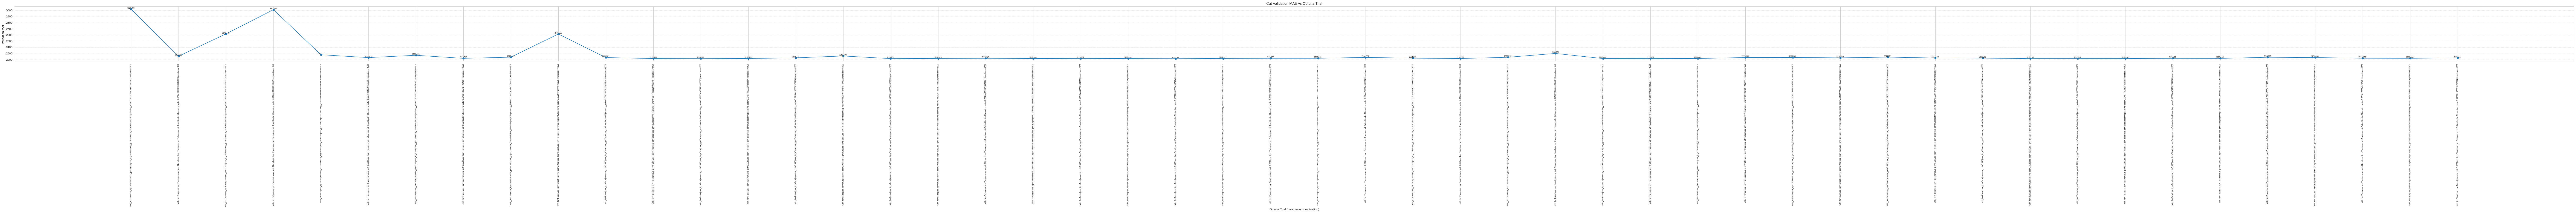

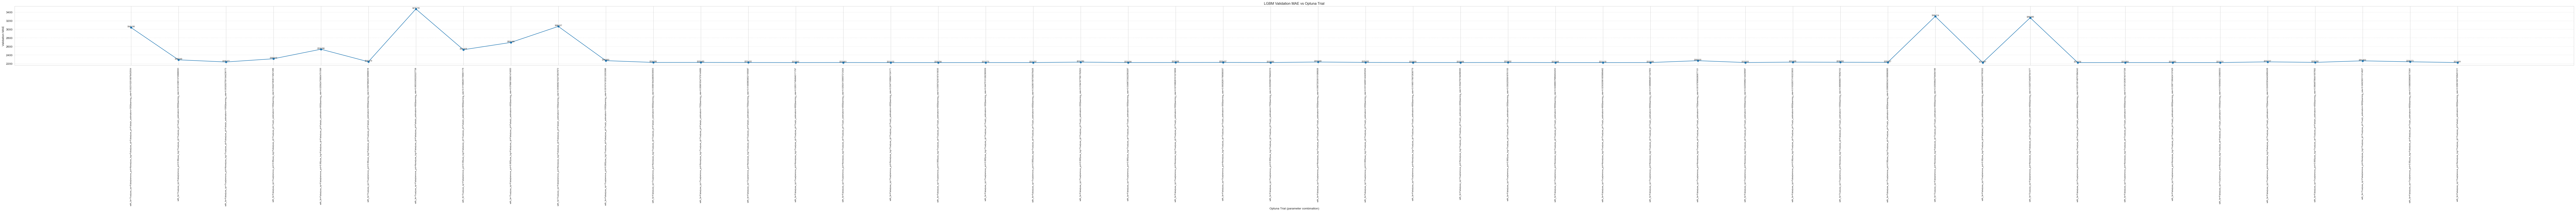

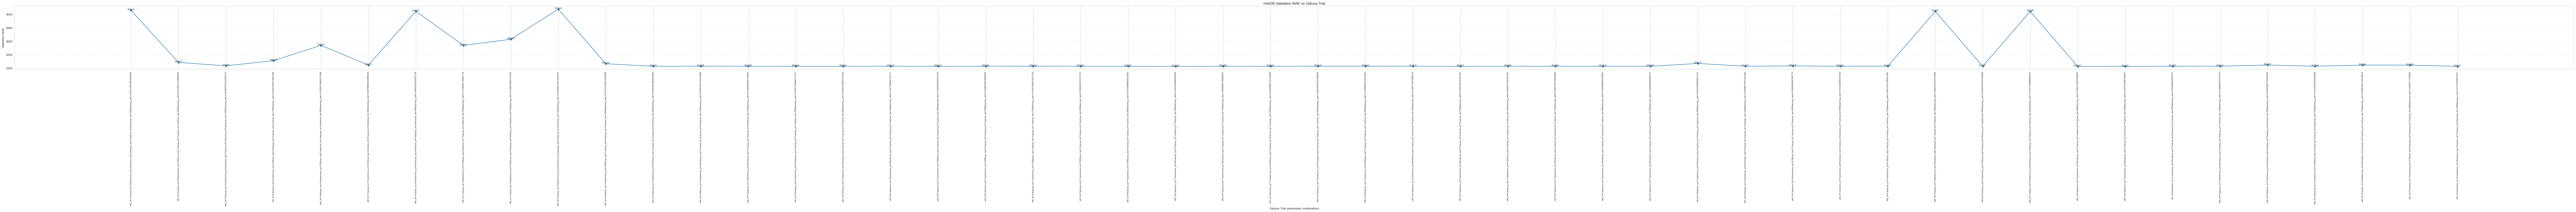

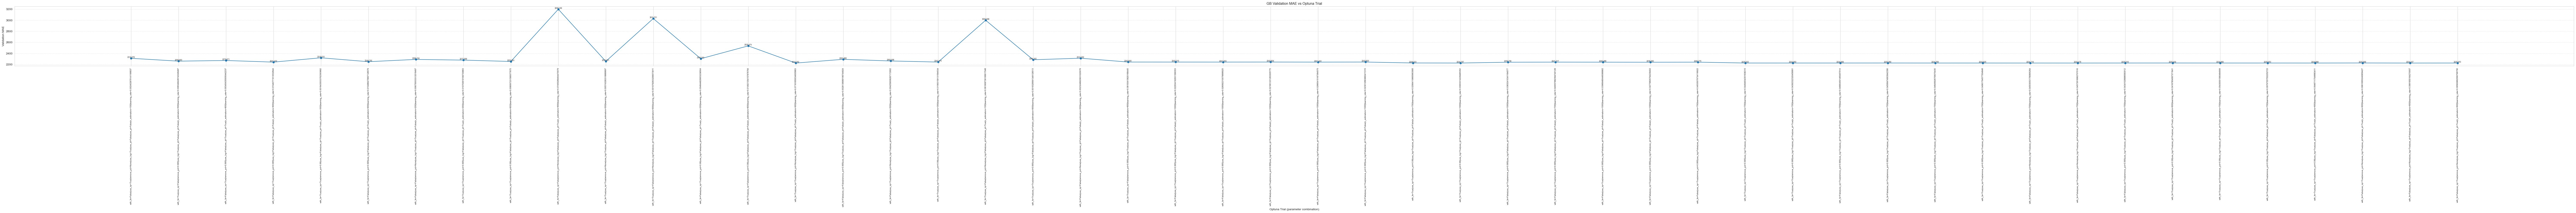

In [29]:
# 하이퍼파라미터 튜닝 시각화

for name, study in studies.items():
    # 1) trials 정보 추출
    records = []
    for t in study.trials:
        # trial.params 는 dict, trial.value 는 validation MAE
        combo = "|".join(f"{k}={v}" for k, v in t.params.items())
        records.append({
            "trial": t.number,
            "validation_MAE": t.value,
            "combo": combo
        })
    df_trials = pd.DataFrame(records)

    # 2) 시각화
    plt.figure(figsize=(120, 10))
    plt.plot(df_trials["trial"], df_trials["validation_MAE"], marker="o", linestyle="-")
    plt.xticks(df_trials["trial"], df_trials["combo"], rotation=90, fontsize=7)
    plt.title(f"{name} Validation MAE vs Optuna Trial")
    plt.xlabel("Optuna Trial (parameter combination)")
    plt.ylabel("Validation MAE")
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    for _, row in df_trials.iterrows():
        plt.text(row["trial"], row["validation_MAE"], f"{row['validation_MAE']:.3f}",
                 ha="center", va="bottom", fontsize=6)
    plt.tight_layout()
    plt.show()

최고 성능 단일 모델       : GB (피처엔지니어링 적용x)  
튜닝된 하이퍼파라미터 : {'use_iqr': False, 'use_rm1': False, 'use_log': False, 'use_qt': False, 'use_pt': True, 'n_estimators': 300, 'learning_rate': 0.022850911182432765, 'max_depth': 5, 'min_samples_split': 5, 'subsample': 0.6919853945828728, 'loss': 'absolute_error'}  
Validation MAE       : 2214.66  
Test MAE             : 2302.05  
Test MSE             : 1.4976e+08

In [30]:
# --- 하이퍼파라미터 튜닝된 모델 앙상블 평가 (전처리 플래그 전부 반영) ---
from itertools import combinations
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.ensemble import VotingRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.preprocessing import PowerTransformer, QuantileTransformer, FunctionTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from tqdm.notebook import tqdm
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error

# ── 앙상블 (Voting) 평가 ──
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import cross_val_score

ensemble_results = []
best_cv = float('inf')
best_combo = None

for r in tqdm(range(2, len(best_pipelines)+1), desc="Ensemble size"):
    for combo in tqdm(list(combinations(best_pipelines.keys(), r)),
                      desc=f"Vote({r}) combos", leave=False):
        pipes = [(k, best_pipelines[k]) for k in combo]
        vr = VotingRegressor(pipes)
        cv_mae = -cross_val_score(
            vr, X_tv, y_tv,
            scoring="neg_mean_absolute_error",
            cv=ps,
        ).mean()
        vr.fit(X_tv, y_tv)
        test_mae = mean_absolute_error(y_test, vr.predict(X_test))
        ensemble_results.append({
            'type':    f"Vote({'+'.join(combo)})",
            'cv_MAE':  cv_mae,
            'test_MAE':test_mae
        })
        # 실시간 최저 갱신
        if cv_mae < best_cv:
            best_cv, best_combo = cv_mae, combo
        tqdm.write(f"[Best so far] {best_combo} → CV MAE: {best_cv:.2f}")

df_ens = pd.DataFrame(ensemble_results) \
             .sort_values('cv_MAE') \
             .reset_index(drop=True)
print("\n=== Ensemble Results ===")
print(df_ens)


Ensemble size:   0%|          | 0/3 [00:00<?, ?it/s]

Vote(2) combos:   0%|          | 0/6 [00:00<?, ?it/s]

0:	learn: 0.9292990	total: 5.99ms	remaining: 9.57s
100:	learn: 0.8515117	total: 242ms	remaining: 3.59s
200:	learn: 0.8322941	total: 471ms	remaining: 3.28s
300:	learn: 0.8169747	total: 726ms	remaining: 3.13s
400:	learn: 0.8031243	total: 940ms	remaining: 2.81s
500:	learn: 0.7887483	total: 1.15s	remaining: 2.53s
600:	learn: 0.7756413	total: 1.39s	remaining: 2.31s
700:	learn: 0.7637189	total: 1.6s	remaining: 2.06s
800:	learn: 0.7523098	total: 1.82s	remaining: 1.81s
900:	learn: 0.7412930	total: 2.07s	remaining: 1.6s
1000:	learn: 0.7298414	total: 2.29s	remaining: 1.37s
1100:	learn: 0.7195337	total: 2.52s	remaining: 1.14s
1200:	learn: 0.7091456	total: 2.75s	remaining: 915ms
1300:	learn: 0.6987067	total: 2.97s	remaining: 683ms
1400:	learn: 0.6892874	total: 3.2s	remaining: 455ms
1500:	learn: 0.6803209	total: 3.43s	remaining: 226ms
1599:	learn: 0.6713555	total: 3.64s	remaining: 0us
0:	learn: 0.9269256	total: 3.69ms	remaining: 5.9s
100:	learn: 0.8500563	total: 270ms	remaining: 4s
200:	learn: 0.83

Vote(3) combos:   0%|          | 0/4 [00:00<?, ?it/s]

0:	learn: 0.9292990	total: 5.67ms	remaining: 9.07s
100:	learn: 0.8515117	total: 222ms	remaining: 3.3s
200:	learn: 0.8322941	total: 440ms	remaining: 3.06s
300:	learn: 0.8169747	total: 665ms	remaining: 2.87s
400:	learn: 0.8031243	total: 886ms	remaining: 2.65s
500:	learn: 0.7887483	total: 1.1s	remaining: 2.41s
600:	learn: 0.7756413	total: 1.31s	remaining: 2.18s
700:	learn: 0.7637189	total: 1.53s	remaining: 1.96s
800:	learn: 0.7523098	total: 1.75s	remaining: 1.75s
900:	learn: 0.7412930	total: 1.96s	remaining: 1.52s
1000:	learn: 0.7298414	total: 2.17s	remaining: 1.3s
1100:	learn: 0.7195337	total: 2.38s	remaining: 1.08s
1200:	learn: 0.7091456	total: 2.59s	remaining: 862ms
1300:	learn: 0.6987067	total: 2.81s	remaining: 646ms
1400:	learn: 0.6892874	total: 3.02s	remaining: 429ms
1500:	learn: 0.6803209	total: 3.23s	remaining: 213ms
1599:	learn: 0.6713555	total: 3.44s	remaining: 0us
0:	learn: 0.9269256	total: 2.95ms	remaining: 4.72s
100:	learn: 0.8500563	total: 324ms	remaining: 4.81s
200:	learn: 

Vote(4) combos:   0%|          | 0/1 [00:00<?, ?it/s]

0:	learn: 0.9292990	total: 3.28ms	remaining: 5.25s
100:	learn: 0.8515117	total: 225ms	remaining: 3.33s
200:	learn: 0.8322941	total: 442ms	remaining: 3.07s
300:	learn: 0.8169747	total: 664ms	remaining: 2.86s
400:	learn: 0.8031243	total: 878ms	remaining: 2.63s
500:	learn: 0.7887483	total: 1.09s	remaining: 2.39s
600:	learn: 0.7756413	total: 1.3s	remaining: 2.17s
700:	learn: 0.7637189	total: 1.55s	remaining: 1.99s
800:	learn: 0.7523098	total: 1.77s	remaining: 1.77s
900:	learn: 0.7412930	total: 1.99s	remaining: 1.54s
1000:	learn: 0.7298414	total: 2.21s	remaining: 1.32s
1100:	learn: 0.7195337	total: 2.42s	remaining: 1.1s
1200:	learn: 0.7091456	total: 2.63s	remaining: 875ms
1300:	learn: 0.6987067	total: 2.84s	remaining: 654ms
1400:	learn: 0.6892874	total: 3.06s	remaining: 435ms
1500:	learn: 0.6803209	total: 3.27s	remaining: 216ms
1599:	learn: 0.6713555	total: 3.48s	remaining: 0us
0:	learn: 0.9269256	total: 4.04ms	remaining: 6.46s
100:	learn: 0.8500563	total: 261ms	remaining: 3.87s
200:	learn:

In [31]:
# ── 상위 3개 앙상블 (가중치 Voting) 튜닝 & 최종 선정 ──
weighted_results = []
top3 = df_ens['type'].head(3).tolist()

for combo in tqdm(top3, desc="Top3 weighted-Vote"):
    names = combo.replace('Vote(','').replace(')','').split('+')
    pipes = [(n, best_pipelines[n]) for n in names]

    # Optuna 스터디 생성
    study_w = optuna.create_study(
        direction="maximize",
        sampler=optuna.samplers.TPESampler(seed=42)
    )
    pbar_w = tqdm(total=20, desc=f"{combo} tuning", unit="trial")

    def on_trial_complete(study, trial):
        pbar_w.update(1)


    def obj_w(trial):
        ws = np.array([trial.suggest_float(f"w_{n}", 0.0, 1.0) for n in names])
        ws = ws / ws.sum()
        vr = VotingRegressor(pipes, weights=ws)   # 내부는 직렬

        return cross_val_score(
            vr, X_tv, y_tv,
            scoring="neg_mean_absolute_error",
            cv=ps,
        ).mean()

    study_w.optimize(
        obj_w,
        n_trials=20,
        callbacks=[on_trial_complete]
    )
    pbar_w.close()

    best_ws = np.array(list(study_w.best_params.values()))
    best_ws /= best_ws.sum()

    vr = VotingRegressor(pipes, weights=best_ws)
    vr.fit(X_tv, y_tv)
    test_mae = mean_absolute_error(y_test, vr.predict(X_test))

    weighted_results.append({
        'type':     combo,
        'cv_MAE':   -study_w.best_value,
        'test_MAE': test_mae,
        'weights':  best_ws
    })
    print(f"[{combo}] weights={best_ws}  CV_MAE={-study_w.best_value:.2f}  Test_MAE={test_mae:.2f}")

df_w = pd.DataFrame(weighted_results) \
           .sort_values('test_MAE') \
           .reset_index(drop=True)

print("\n=== Weighted Voting Results (top3) ===")
print(df_w[['type','cv_MAE','test_MAE','weights']])

# ── 최종 앙상블 모델 출력 ──
best_ens = df_w.iloc[0]
print(f"\n>>> 최종 앙상블: {best_ens['type']}  " +
      f"(CV MAE: {best_ens['cv_MAE']:.2f}, Test MAE: {best_ens['test_MAE']:.2f})")
print(f"    Weights: {best_ens['weights']}")

Top3 weighted-Vote:   0%|          | 0/3 [00:00<?, ?it/s]

[I 2025-05-19 22:19:16,521] A new study created in memory with name: no-name-286c2f86-4fb9-4d44-b716-64d0ae3a47ed


Vote(Cat+LGBM+HistGB) tuning:   0%|          | 0/20 [00:00<?, ?trial/s]

0:	learn: 0.9292990	total: 7.03ms	remaining: 11.2s
100:	learn: 0.8515117	total: 256ms	remaining: 3.8s
200:	learn: 0.8322941	total: 509ms	remaining: 3.54s
300:	learn: 0.8169747	total: 761ms	remaining: 3.29s
400:	learn: 0.8031243	total: 989ms	remaining: 2.96s
500:	learn: 0.7887483	total: 1.22s	remaining: 2.67s
600:	learn: 0.7756413	total: 1.47s	remaining: 2.45s
700:	learn: 0.7637189	total: 1.72s	remaining: 2.21s
800:	learn: 0.7523098	total: 1.95s	remaining: 1.94s
900:	learn: 0.7412930	total: 2.17s	remaining: 1.68s
1000:	learn: 0.7298414	total: 2.4s	remaining: 1.43s
1100:	learn: 0.7195337	total: 2.62s	remaining: 1.19s
1200:	learn: 0.7091456	total: 2.84s	remaining: 943ms
1300:	learn: 0.6987067	total: 3.07s	remaining: 705ms
1400:	learn: 0.6892874	total: 3.29s	remaining: 467ms
1500:	learn: 0.6803209	total: 3.51s	remaining: 231ms
1599:	learn: 0.6713555	total: 3.73s	remaining: 0us


[I 2025-05-19 22:19:25,001] Trial 0 finished with value: -2239.401792824619 and parameters: {'w_Cat': 0.3745401188473625, 'w_LGBM': 0.9507143064099162, 'w_HistGB': 0.7319939418114051}. Best is trial 0 with value: -2239.401792824619.


0:	learn: 0.9292990	total: 2.44ms	remaining: 3.9s
100:	learn: 0.8515117	total: 269ms	remaining: 3.99s
200:	learn: 0.8322941	total: 530ms	remaining: 3.69s
300:	learn: 0.8169747	total: 803ms	remaining: 3.46s
400:	learn: 0.8031243	total: 1.07s	remaining: 3.2s
500:	learn: 0.7887483	total: 1.33s	remaining: 2.92s
600:	learn: 0.7756413	total: 1.62s	remaining: 2.69s
700:	learn: 0.7637189	total: 1.89s	remaining: 2.43s
800:	learn: 0.7523098	total: 2.13s	remaining: 2.13s
900:	learn: 0.7412930	total: 2.36s	remaining: 1.83s
1000:	learn: 0.7298414	total: 2.6s	remaining: 1.55s
1100:	learn: 0.7195337	total: 2.84s	remaining: 1.29s
1200:	learn: 0.7091456	total: 3.1s	remaining: 1.03s
1300:	learn: 0.6987067	total: 3.35s	remaining: 770ms
1400:	learn: 0.6892874	total: 3.59s	remaining: 510ms
1500:	learn: 0.6803209	total: 3.83s	remaining: 252ms
1599:	learn: 0.6713555	total: 4.05s	remaining: 0us


[I 2025-05-19 22:19:33,777] Trial 1 finished with value: -2241.170807512128 and parameters: {'w_Cat': 0.5986584841970366, 'w_LGBM': 0.15601864044243652, 'w_HistGB': 0.15599452033620265}. Best is trial 0 with value: -2239.401792824619.


0:	learn: 0.9292990	total: 2.49ms	remaining: 3.98s
100:	learn: 0.8515117	total: 239ms	remaining: 3.54s
200:	learn: 0.8322941	total: 502ms	remaining: 3.49s
300:	learn: 0.8169747	total: 734ms	remaining: 3.17s
400:	learn: 0.8031243	total: 971ms	remaining: 2.9s
500:	learn: 0.7887483	total: 1.2s	remaining: 2.64s
600:	learn: 0.7756413	total: 1.43s	remaining: 2.38s
700:	learn: 0.7637189	total: 1.67s	remaining: 2.14s
800:	learn: 0.7523098	total: 1.91s	remaining: 1.9s
900:	learn: 0.7412930	total: 2.14s	remaining: 1.66s
1000:	learn: 0.7298414	total: 2.37s	remaining: 1.42s
1100:	learn: 0.7195337	total: 2.6s	remaining: 1.18s
1200:	learn: 0.7091456	total: 2.83s	remaining: 939ms
1300:	learn: 0.6987067	total: 3.06s	remaining: 703ms
1400:	learn: 0.6892874	total: 3.29s	remaining: 467ms
1500:	learn: 0.6803209	total: 3.52s	remaining: 232ms
1599:	learn: 0.6713555	total: 3.75s	remaining: 0us


[I 2025-05-19 22:19:42,259] Trial 2 finished with value: -2239.8993281503663 and parameters: {'w_Cat': 0.05808361216819946, 'w_LGBM': 0.8661761457749352, 'w_HistGB': 0.6011150117432088}. Best is trial 0 with value: -2239.401792824619.


0:	learn: 0.9292990	total: 3.23ms	remaining: 5.16s
100:	learn: 0.8515117	total: 272ms	remaining: 4.04s
200:	learn: 0.8322941	total: 530ms	remaining: 3.69s
300:	learn: 0.8169747	total: 772ms	remaining: 3.33s
400:	learn: 0.8031243	total: 1s	remaining: 3.01s
500:	learn: 0.7887483	total: 1.24s	remaining: 2.72s
600:	learn: 0.7756413	total: 1.46s	remaining: 2.43s
700:	learn: 0.7637189	total: 1.69s	remaining: 2.17s
800:	learn: 0.7523098	total: 1.92s	remaining: 1.92s
900:	learn: 0.7412930	total: 2.15s	remaining: 1.67s
1000:	learn: 0.7298414	total: 2.38s	remaining: 1.43s
1100:	learn: 0.7195337	total: 2.61s	remaining: 1.18s
1200:	learn: 0.7091456	total: 2.84s	remaining: 944ms
1300:	learn: 0.6987067	total: 3.08s	remaining: 707ms
1400:	learn: 0.6892874	total: 3.31s	remaining: 470ms
1500:	learn: 0.6803209	total: 3.54s	remaining: 234ms
1599:	learn: 0.6713555	total: 3.78s	remaining: 0us


[I 2025-05-19 22:19:50,880] Trial 3 finished with value: -2241.614252644052 and parameters: {'w_Cat': 0.7080725777960455, 'w_LGBM': 0.020584494295802447, 'w_HistGB': 0.9699098521619943}. Best is trial 0 with value: -2239.401792824619.


0:	learn: 0.9292990	total: 2.62ms	remaining: 4.19s
100:	learn: 0.8515117	total: 282ms	remaining: 4.19s
200:	learn: 0.8322941	total: 522ms	remaining: 3.63s
300:	learn: 0.8169747	total: 760ms	remaining: 3.28s
400:	learn: 0.8031243	total: 1.01s	remaining: 3.03s
500:	learn: 0.7887483	total: 1.25s	remaining: 2.75s
600:	learn: 0.7756413	total: 1.48s	remaining: 2.46s
700:	learn: 0.7637189	total: 1.71s	remaining: 2.2s
800:	learn: 0.7523098	total: 1.94s	remaining: 1.94s
900:	learn: 0.7412930	total: 2.18s	remaining: 1.69s
1000:	learn: 0.7298414	total: 2.44s	remaining: 1.46s
1100:	learn: 0.7195337	total: 2.69s	remaining: 1.22s
1200:	learn: 0.7091456	total: 2.92s	remaining: 970ms
1300:	learn: 0.6987067	total: 3.16s	remaining: 726ms
1400:	learn: 0.6892874	total: 3.38s	remaining: 481ms
1500:	learn: 0.6803209	total: 3.62s	remaining: 239ms
1599:	learn: 0.6713555	total: 3.87s	remaining: 0us


[I 2025-05-19 22:19:59,457] Trial 4 finished with value: -2241.312849112868 and parameters: {'w_Cat': 0.8324426408004217, 'w_LGBM': 0.21233911067827616, 'w_HistGB': 0.18182496720710062}. Best is trial 0 with value: -2239.401792824619.


0:	learn: 0.9292990	total: 6ms	remaining: 9.6s
100:	learn: 0.8515117	total: 245ms	remaining: 3.64s
200:	learn: 0.8322941	total: 475ms	remaining: 3.3s
300:	learn: 0.8169747	total: 713ms	remaining: 3.08s
400:	learn: 0.8031243	total: 947ms	remaining: 2.83s
500:	learn: 0.7887483	total: 1.19s	remaining: 2.6s
600:	learn: 0.7756413	total: 1.43s	remaining: 2.37s
700:	learn: 0.7637189	total: 1.67s	remaining: 2.14s
800:	learn: 0.7523098	total: 1.9s	remaining: 1.9s
900:	learn: 0.7412930	total: 2.13s	remaining: 1.66s
1000:	learn: 0.7298414	total: 2.37s	remaining: 1.42s
1100:	learn: 0.7195337	total: 2.6s	remaining: 1.18s
1200:	learn: 0.7091456	total: 2.83s	remaining: 941ms
1300:	learn: 0.6987067	total: 3.07s	remaining: 705ms
1400:	learn: 0.6892874	total: 3.3s	remaining: 468ms
1500:	learn: 0.6803209	total: 3.53s	remaining: 233ms
1599:	learn: 0.6713555	total: 3.76s	remaining: 0us


[I 2025-05-19 22:20:07,956] Trial 5 finished with value: -2239.979514045213 and parameters: {'w_Cat': 0.18340450985343382, 'w_LGBM': 0.3042422429595377, 'w_HistGB': 0.5247564316322378}. Best is trial 0 with value: -2239.401792824619.


0:	learn: 0.9292990	total: 3.83ms	remaining: 6.12s
100:	learn: 0.8515117	total: 242ms	remaining: 3.59s
200:	learn: 0.8322941	total: 484ms	remaining: 3.37s
300:	learn: 0.8169747	total: 721ms	remaining: 3.11s
400:	learn: 0.8031243	total: 957ms	remaining: 2.86s
500:	learn: 0.7887483	total: 1.18s	remaining: 2.6s
600:	learn: 0.7756413	total: 1.43s	remaining: 2.37s
700:	learn: 0.7637189	total: 1.66s	remaining: 2.13s
800:	learn: 0.7523098	total: 1.89s	remaining: 1.88s
900:	learn: 0.7412930	total: 2.12s	remaining: 1.64s
1000:	learn: 0.7298414	total: 2.35s	remaining: 1.4s
1100:	learn: 0.7195337	total: 2.58s	remaining: 1.17s
1200:	learn: 0.7091456	total: 2.8s	remaining: 931ms
1300:	learn: 0.6987067	total: 3.03s	remaining: 696ms
1400:	learn: 0.6892874	total: 3.26s	remaining: 463ms
1500:	learn: 0.6803209	total: 3.48s	remaining: 230ms
1599:	learn: 0.6713555	total: 3.72s	remaining: 0us


[I 2025-05-19 22:20:16,153] Trial 6 finished with value: -2240.164011494348 and parameters: {'w_Cat': 0.43194501864211576, 'w_LGBM': 0.2912291401980419, 'w_HistGB': 0.6118528947223795}. Best is trial 0 with value: -2239.401792824619.


0:	learn: 0.9292990	total: 2.61ms	remaining: 4.17s
100:	learn: 0.8515117	total: 234ms	remaining: 3.48s
200:	learn: 0.8322941	total: 471ms	remaining: 3.28s
300:	learn: 0.8169747	total: 704ms	remaining: 3.04s
400:	learn: 0.8031243	total: 934ms	remaining: 2.79s
500:	learn: 0.7887483	total: 1.16s	remaining: 2.55s
600:	learn: 0.7756413	total: 1.39s	remaining: 2.31s
700:	learn: 0.7637189	total: 1.62s	remaining: 2.08s
800:	learn: 0.7523098	total: 1.86s	remaining: 1.85s
900:	learn: 0.7412930	total: 2.14s	remaining: 1.66s
1000:	learn: 0.7298414	total: 2.39s	remaining: 1.43s
1100:	learn: 0.7195337	total: 2.63s	remaining: 1.19s
1200:	learn: 0.7091456	total: 2.87s	remaining: 952ms
1300:	learn: 0.6987067	total: 3.1s	remaining: 712ms
1400:	learn: 0.6892874	total: 3.32s	remaining: 472ms
1500:	learn: 0.6803209	total: 3.56s	remaining: 234ms
1599:	learn: 0.6713555	total: 3.78s	remaining: 0us


[I 2025-05-19 22:20:24,759] Trial 7 finished with value: -2239.690736644407 and parameters: {'w_Cat': 0.13949386065204183, 'w_LGBM': 0.29214464853521815, 'w_HistGB': 0.3663618432936917}. Best is trial 0 with value: -2239.401792824619.


0:	learn: 0.9292990	total: 2.46ms	remaining: 3.93s
100:	learn: 0.8515117	total: 241ms	remaining: 3.57s
200:	learn: 0.8322941	total: 474ms	remaining: 3.3s
300:	learn: 0.8169747	total: 708ms	remaining: 3.06s
400:	learn: 0.8031243	total: 947ms	remaining: 2.83s
500:	learn: 0.7887483	total: 1.18s	remaining: 2.59s
600:	learn: 0.7756413	total: 1.43s	remaining: 2.38s
700:	learn: 0.7637189	total: 1.66s	remaining: 2.13s
800:	learn: 0.7523098	total: 1.89s	remaining: 1.89s
900:	learn: 0.7412930	total: 2.13s	remaining: 1.66s
1000:	learn: 0.7298414	total: 2.39s	remaining: 1.43s
1100:	learn: 0.7195337	total: 2.62s	remaining: 1.19s
1200:	learn: 0.7091456	total: 2.86s	remaining: 949ms
1300:	learn: 0.6987067	total: 3.1s	remaining: 711ms
1400:	learn: 0.6892874	total: 3.35s	remaining: 476ms
1500:	learn: 0.6803209	total: 3.6s	remaining: 238ms
1599:	learn: 0.6713555	total: 3.85s	remaining: 0us


[I 2025-05-19 22:20:33,375] Trial 8 finished with value: -2239.36804158011 and parameters: {'w_Cat': 0.45606998421703593, 'w_LGBM': 0.7851759613930136, 'w_HistGB': 0.19967378215835974}. Best is trial 8 with value: -2239.36804158011.


0:	learn: 0.9292990	total: 3.11ms	remaining: 4.98s
100:	learn: 0.8515117	total: 248ms	remaining: 3.68s
200:	learn: 0.8322941	total: 510ms	remaining: 3.55s
300:	learn: 0.8169747	total: 786ms	remaining: 3.39s
400:	learn: 0.8031243	total: 1.04s	remaining: 3.11s
500:	learn: 0.7887483	total: 1.28s	remaining: 2.82s
600:	learn: 0.7756413	total: 1.51s	remaining: 2.51s
700:	learn: 0.7637189	total: 1.75s	remaining: 2.24s
800:	learn: 0.7523098	total: 1.98s	remaining: 1.98s
900:	learn: 0.7412930	total: 2.21s	remaining: 1.72s
1000:	learn: 0.7298414	total: 2.45s	remaining: 1.46s
1100:	learn: 0.7195337	total: 2.68s	remaining: 1.21s
1200:	learn: 0.7091456	total: 2.91s	remaining: 967ms
1300:	learn: 0.6987067	total: 3.15s	remaining: 724ms
1400:	learn: 0.6892874	total: 3.38s	remaining: 480ms
1500:	learn: 0.6803209	total: 3.62s	remaining: 239ms
1599:	learn: 0.6713555	total: 3.85s	remaining: 0us


[I 2025-05-19 22:20:42,026] Trial 9 finished with value: -2239.8478695324175 and parameters: {'w_Cat': 0.5142344384136116, 'w_LGBM': 0.5924145688620425, 'w_HistGB': 0.046450412719997725}. Best is trial 8 with value: -2239.36804158011.


0:	learn: 0.9292990	total: 2.62ms	remaining: 4.19s
100:	learn: 0.8515117	total: 242ms	remaining: 3.6s
200:	learn: 0.8322941	total: 480ms	remaining: 3.34s
300:	learn: 0.8169747	total: 716ms	remaining: 3.09s
400:	learn: 0.8031243	total: 951ms	remaining: 2.84s
500:	learn: 0.7887483	total: 1.2s	remaining: 2.62s
600:	learn: 0.7756413	total: 1.46s	remaining: 2.43s
700:	learn: 0.7637189	total: 1.71s	remaining: 2.19s
800:	learn: 0.7523098	total: 1.95s	remaining: 1.95s
900:	learn: 0.7412930	total: 2.19s	remaining: 1.7s
1000:	learn: 0.7298414	total: 2.43s	remaining: 1.45s
1100:	learn: 0.7195337	total: 2.66s	remaining: 1.21s
1200:	learn: 0.7091456	total: 2.9s	remaining: 964ms
1300:	learn: 0.6987067	total: 3.14s	remaining: 722ms
1400:	learn: 0.6892874	total: 3.38s	remaining: 480ms
1500:	learn: 0.6803209	total: 3.62s	remaining: 239ms
1599:	learn: 0.6713555	total: 3.86s	remaining: 0us


[I 2025-05-19 22:20:50,671] Trial 10 finished with value: -2239.9355255484465 and parameters: {'w_Cat': 0.9451365442303868, 'w_LGBM': 0.6998750099215976, 'w_HistGB': 0.31997145555551787}. Best is trial 8 with value: -2239.36804158011.


0:	learn: 0.9292990	total: 2.25ms	remaining: 3.59s
100:	learn: 0.8515117	total: 243ms	remaining: 3.61s
200:	learn: 0.8322941	total: 516ms	remaining: 3.59s
300:	learn: 0.8169747	total: 773ms	remaining: 3.33s
400:	learn: 0.8031243	total: 1s	remaining: 2.99s
500:	learn: 0.7887483	total: 1.23s	remaining: 2.7s
600:	learn: 0.7756413	total: 1.46s	remaining: 2.43s
700:	learn: 0.7637189	total: 1.7s	remaining: 2.18s
800:	learn: 0.7523098	total: 1.96s	remaining: 1.95s
900:	learn: 0.7412930	total: 2.19s	remaining: 1.7s
1000:	learn: 0.7298414	total: 2.44s	remaining: 1.46s
1100:	learn: 0.7195337	total: 2.73s	remaining: 1.24s
1200:	learn: 0.7091456	total: 2.99s	remaining: 995ms
1300:	learn: 0.6987067	total: 3.23s	remaining: 743ms
1400:	learn: 0.6892874	total: 3.47s	remaining: 493ms
1500:	learn: 0.6803209	total: 3.71s	remaining: 245ms
1599:	learn: 0.6713555	total: 3.94s	remaining: 0us


[I 2025-05-19 22:20:59,448] Trial 11 finished with value: -2239.456147829443 and parameters: {'w_Cat': 0.3468508914066219, 'w_LGBM': 0.9900675403074437, 'w_HistGB': 0.8021998681801723}. Best is trial 8 with value: -2239.36804158011.


0:	learn: 0.9292990	total: 2.74ms	remaining: 4.38s
100:	learn: 0.8515117	total: 286ms	remaining: 4.24s
200:	learn: 0.8322941	total: 541ms	remaining: 3.76s
300:	learn: 0.8169747	total: 780ms	remaining: 3.36s
400:	learn: 0.8031243	total: 1.01s	remaining: 3.03s
500:	learn: 0.7887483	total: 1.25s	remaining: 2.75s
600:	learn: 0.7756413	total: 1.51s	remaining: 2.51s
700:	learn: 0.7637189	total: 1.76s	remaining: 2.26s
800:	learn: 0.7523098	total: 2s	remaining: 1.99s
900:	learn: 0.7412930	total: 2.24s	remaining: 1.74s
1000:	learn: 0.7298414	total: 2.49s	remaining: 1.49s
1100:	learn: 0.7195337	total: 2.72s	remaining: 1.23s
1200:	learn: 0.7091456	total: 2.97s	remaining: 987ms
1300:	learn: 0.6987067	total: 3.22s	remaining: 740ms
1400:	learn: 0.6892874	total: 3.46s	remaining: 491ms
1500:	learn: 0.6803209	total: 3.69s	remaining: 244ms
1599:	learn: 0.6713555	total: 3.93s	remaining: 0us


[I 2025-05-19 22:21:07,991] Trial 12 finished with value: -2239.556980752002 and parameters: {'w_Cat': 0.3044327664902462, 'w_LGBM': 0.8065210104526364, 'w_HistGB': 0.7836296211490168}. Best is trial 8 with value: -2239.36804158011.


0:	learn: 0.9292990	total: 3.21ms	remaining: 5.14s
100:	learn: 0.8515117	total: 245ms	remaining: 3.63s
200:	learn: 0.8322941	total: 485ms	remaining: 3.38s
300:	learn: 0.8169747	total: 783ms	remaining: 3.38s
400:	learn: 0.8031243	total: 1.04s	remaining: 3.1s
500:	learn: 0.7887483	total: 1.27s	remaining: 2.79s
600:	learn: 0.7756413	total: 1.51s	remaining: 2.51s
700:	learn: 0.7637189	total: 1.74s	remaining: 2.23s
800:	learn: 0.7523098	total: 1.97s	remaining: 1.97s
900:	learn: 0.7412930	total: 2.2s	remaining: 1.71s
1000:	learn: 0.7298414	total: 2.43s	remaining: 1.45s
1100:	learn: 0.7195337	total: 2.66s	remaining: 1.2s
1200:	learn: 0.7091456	total: 2.89s	remaining: 961ms
1300:	learn: 0.6987067	total: 3.17s	remaining: 729ms
1400:	learn: 0.6892874	total: 3.43s	remaining: 488ms
1500:	learn: 0.6803209	total: 3.67s	remaining: 242ms
1599:	learn: 0.6713555	total: 3.91s	remaining: 0us


[I 2025-05-19 22:21:16,551] Trial 13 finished with value: -2239.393418407036 and parameters: {'w_Cat': 0.6437127366238236, 'w_LGBM': 0.9907929889738695, 'w_HistGB': 0.7473941873052092}. Best is trial 8 with value: -2239.36804158011.


0:	learn: 0.9292990	total: 2.59ms	remaining: 4.15s
100:	learn: 0.8515117	total: 239ms	remaining: 3.55s
200:	learn: 0.8322941	total: 483ms	remaining: 3.36s
300:	learn: 0.8169747	total: 718ms	remaining: 3.1s
400:	learn: 0.8031243	total: 954ms	remaining: 2.85s
500:	learn: 0.7887483	total: 1.2s	remaining: 2.63s
600:	learn: 0.7756413	total: 1.46s	remaining: 2.43s
700:	learn: 0.7637189	total: 1.69s	remaining: 2.17s
800:	learn: 0.7523098	total: 1.92s	remaining: 1.92s
900:	learn: 0.7412930	total: 2.17s	remaining: 1.68s
1000:	learn: 0.7298414	total: 2.39s	remaining: 1.43s
1100:	learn: 0.7195337	total: 2.63s	remaining: 1.19s
1200:	learn: 0.7091456	total: 2.87s	remaining: 953ms
1300:	learn: 0.6987067	total: 3.13s	remaining: 719ms
1400:	learn: 0.6892874	total: 3.37s	remaining: 478ms
1500:	learn: 0.6803209	total: 3.6s	remaining: 238ms
1599:	learn: 0.6713555	total: 3.83s	remaining: 0us


[I 2025-05-19 22:21:24,867] Trial 14 finished with value: -2239.8426559924487 and parameters: {'w_Cat': 0.6615332130837828, 'w_LGBM': 0.48575566073382637, 'w_HistGB': 0.3534430313428961}. Best is trial 8 with value: -2239.36804158011.


0:	learn: 0.9292990	total: 2.24ms	remaining: 3.59s
100:	learn: 0.8515117	total: 245ms	remaining: 3.63s
200:	learn: 0.8322941	total: 483ms	remaining: 3.36s
300:	learn: 0.8169747	total: 722ms	remaining: 3.12s
400:	learn: 0.8031243	total: 960ms	remaining: 2.87s
500:	learn: 0.7887483	total: 1.19s	remaining: 2.6s
600:	learn: 0.7756413	total: 1.42s	remaining: 2.35s
700:	learn: 0.7637189	total: 1.66s	remaining: 2.13s
800:	learn: 0.7523098	total: 1.88s	remaining: 1.88s
900:	learn: 0.7412930	total: 2.12s	remaining: 1.64s
1000:	learn: 0.7298414	total: 2.35s	remaining: 1.4s
1100:	learn: 0.7195337	total: 2.58s	remaining: 1.17s
1200:	learn: 0.7091456	total: 2.81s	remaining: 934ms
1300:	learn: 0.6987067	total: 3.04s	remaining: 700ms
1400:	learn: 0.6892874	total: 3.27s	remaining: 465ms
1500:	learn: 0.6803209	total: 3.5s	remaining: 231ms
1599:	learn: 0.6713555	total: 3.73s	remaining: 0us


[I 2025-05-19 22:21:32,918] Trial 15 finished with value: -2239.834694881493 and parameters: {'w_Cat': 0.7806512927498215, 'w_LGBM': 0.6898904233496919, 'w_HistGB': 0.9972657639661848}. Best is trial 8 with value: -2239.36804158011.


0:	learn: 0.9292990	total: 2.47ms	remaining: 3.94s
100:	learn: 0.8515117	total: 261ms	remaining: 3.88s
200:	learn: 0.8322941	total: 500ms	remaining: 3.48s
300:	learn: 0.8169747	total: 742ms	remaining: 3.2s
400:	learn: 0.8031243	total: 983ms	remaining: 2.94s
500:	learn: 0.7887483	total: 1.23s	remaining: 2.69s
600:	learn: 0.7756413	total: 1.47s	remaining: 2.45s
700:	learn: 0.7637189	total: 1.71s	remaining: 2.19s
800:	learn: 0.7523098	total: 1.94s	remaining: 1.93s
900:	learn: 0.7412930	total: 2.18s	remaining: 1.69s
1000:	learn: 0.7298414	total: 2.41s	remaining: 1.44s
1100:	learn: 0.7195337	total: 2.65s	remaining: 1.2s
1200:	learn: 0.7091456	total: 2.88s	remaining: 958ms
1300:	learn: 0.6987067	total: 3.12s	remaining: 716ms
1400:	learn: 0.6892874	total: 3.35s	remaining: 476ms
1500:	learn: 0.6803209	total: 3.58s	remaining: 236ms
1599:	learn: 0.6713555	total: 3.81s	remaining: 0us


[I 2025-05-19 22:21:41,576] Trial 16 finished with value: -2239.3372893751202 and parameters: {'w_Cat': 0.5120684458715119, 'w_LGBM': 0.8371306207701477, 'w_HistGB': 0.4462365332594103}. Best is trial 16 with value: -2239.3372893751202.


0:	learn: 0.9292990	total: 2.44ms	remaining: 3.91s
100:	learn: 0.8515117	total: 266ms	remaining: 3.95s
200:	learn: 0.8322941	total: 501ms	remaining: 3.49s
300:	learn: 0.8169747	total: 738ms	remaining: 3.18s
400:	learn: 0.8031243	total: 968ms	remaining: 2.9s
500:	learn: 0.7887483	total: 1.2s	remaining: 2.64s
600:	learn: 0.7756413	total: 1.44s	remaining: 2.39s
700:	learn: 0.7637189	total: 1.67s	remaining: 2.14s
800:	learn: 0.7523098	total: 1.91s	remaining: 1.9s
900:	learn: 0.7412930	total: 2.14s	remaining: 1.66s
1000:	learn: 0.7298414	total: 2.37s	remaining: 1.42s
1100:	learn: 0.7195337	total: 2.6s	remaining: 1.18s
1200:	learn: 0.7091456	total: 2.84s	remaining: 943ms
1300:	learn: 0.6987067	total: 3.08s	remaining: 707ms
1400:	learn: 0.6892874	total: 3.31s	remaining: 470ms
1500:	learn: 0.6803209	total: 3.55s	remaining: 234ms
1599:	learn: 0.6713555	total: 3.78s	remaining: 0us


[I 2025-05-19 22:21:50,011] Trial 17 finished with value: -2239.6668545257344 and parameters: {'w_Cat': 0.5277788930300321, 'w_LGBM': 0.4856324185622646, 'w_HistGB': 0.27448497328248095}. Best is trial 16 with value: -2239.3372893751202.


0:	learn: 0.9292990	total: 2.58ms	remaining: 4.13s
100:	learn: 0.8515117	total: 264ms	remaining: 3.92s
200:	learn: 0.8322941	total: 496ms	remaining: 3.45s
300:	learn: 0.8169747	total: 730ms	remaining: 3.15s
400:	learn: 0.8031243	total: 956ms	remaining: 2.86s
500:	learn: 0.7887483	total: 1.19s	remaining: 2.6s
600:	learn: 0.7756413	total: 1.42s	remaining: 2.36s
700:	learn: 0.7637189	total: 1.66s	remaining: 2.13s
800:	learn: 0.7523098	total: 1.89s	remaining: 1.89s
900:	learn: 0.7412930	total: 2.13s	remaining: 1.65s
1000:	learn: 0.7298414	total: 2.37s	remaining: 1.42s
1100:	learn: 0.7195337	total: 2.6s	remaining: 1.18s
1200:	learn: 0.7091456	total: 2.84s	remaining: 944ms
1300:	learn: 0.6987067	total: 3.1s	remaining: 712ms
1400:	learn: 0.6892874	total: 3.34s	remaining: 474ms
1500:	learn: 0.6803209	total: 3.57s	remaining: 236ms
1599:	learn: 0.6713555	total: 3.81s	remaining: 0us


[I 2025-05-19 22:21:58,754] Trial 18 finished with value: -2239.3292156052603 and parameters: {'w_Cat': 0.24688024848537682, 'w_LGBM': 0.7819728944244086, 'w_HistGB': 0.4530195107776699}. Best is trial 18 with value: -2239.3292156052603.


0:	learn: 0.9292990	total: 3.03ms	remaining: 4.84s
100:	learn: 0.8515117	total: 267ms	remaining: 3.96s
200:	learn: 0.8322941	total: 503ms	remaining: 3.5s
300:	learn: 0.8169747	total: 739ms	remaining: 3.19s
400:	learn: 0.8031243	total: 992ms	remaining: 2.97s
500:	learn: 0.7887483	total: 1.22s	remaining: 2.67s
600:	learn: 0.7756413	total: 1.45s	remaining: 2.41s
700:	learn: 0.7637189	total: 1.67s	remaining: 2.15s
800:	learn: 0.7523098	total: 1.9s	remaining: 1.9s
900:	learn: 0.7412930	total: 2.14s	remaining: 1.66s
1000:	learn: 0.7298414	total: 2.39s	remaining: 1.43s
1100:	learn: 0.7195337	total: 2.65s	remaining: 1.2s
1200:	learn: 0.7091456	total: 2.91s	remaining: 968ms
1300:	learn: 0.6987067	total: 3.15s	remaining: 723ms
1400:	learn: 0.6892874	total: 3.38s	remaining: 480ms
1500:	learn: 0.6803209	total: 3.6s	remaining: 238ms
1599:	learn: 0.6713555	total: 3.84s	remaining: 0us


[I 2025-05-19 22:22:07,195] Trial 19 finished with value: -2239.3903617311366 and parameters: {'w_Cat': 0.22713901165087869, 'w_LGBM': 0.619374498389929, 'w_HistGB': 0.4528449442891967}. Best is trial 18 with value: -2239.3292156052603.


0:	learn: 0.9269256	total: 3.28ms	remaining: 5.25s
100:	learn: 0.8500563	total: 267ms	remaining: 3.96s
200:	learn: 0.8331145	total: 544ms	remaining: 3.79s
300:	learn: 0.8205964	total: 807ms	remaining: 3.48s
400:	learn: 0.8089871	total: 1.06s	remaining: 3.18s
500:	learn: 0.7966054	total: 1.32s	remaining: 2.9s
600:	learn: 0.7850962	total: 1.58s	remaining: 2.62s
700:	learn: 0.7736896	total: 1.84s	remaining: 2.35s
800:	learn: 0.7632383	total: 2.1s	remaining: 2.09s
900:	learn: 0.7534973	total: 2.35s	remaining: 1.83s
1000:	learn: 0.7441455	total: 2.61s	remaining: 1.56s
1100:	learn: 0.7349165	total: 2.87s	remaining: 1.3s
1200:	learn: 0.7260888	total: 3.12s	remaining: 1.04s
1300:	learn: 0.7179264	total: 3.37s	remaining: 775ms
1400:	learn: 0.7096192	total: 3.63s	remaining: 516ms
1500:	learn: 0.7018397	total: 3.89s	remaining: 257ms
1599:	learn: 0.6943864	total: 4.16s	remaining: 0us


[I 2025-05-19 22:22:17,123] A new study created in memory with name: no-name-0cf96742-e3b8-4552-8bf6-73765feda221


[Vote(Cat+LGBM+HistGB)] weights=[0.16660018 0.52769237 0.30570745]  CV_MAE=2239.33  Test_MAE=2320.93


Vote(Cat+LGBM) tuning:   0%|          | 0/20 [00:00<?, ?trial/s]

0:	learn: 0.9292990	total: 4.29ms	remaining: 6.85s
100:	learn: 0.8515117	total: 257ms	remaining: 3.81s
200:	learn: 0.8322941	total: 513ms	remaining: 3.57s
300:	learn: 0.8169747	total: 763ms	remaining: 3.29s
400:	learn: 0.8031243	total: 1.02s	remaining: 3.04s
500:	learn: 0.7887483	total: 1.26s	remaining: 2.76s
600:	learn: 0.7756413	total: 1.51s	remaining: 2.51s
700:	learn: 0.7637189	total: 1.75s	remaining: 2.25s
800:	learn: 0.7523098	total: 1.99s	remaining: 1.99s
900:	learn: 0.7412930	total: 2.22s	remaining: 1.73s
1000:	learn: 0.7298414	total: 2.46s	remaining: 1.47s
1100:	learn: 0.7195337	total: 2.71s	remaining: 1.23s
1200:	learn: 0.7091456	total: 2.95s	remaining: 981ms
1300:	learn: 0.6987067	total: 3.19s	remaining: 732ms
1400:	learn: 0.6892874	total: 3.41s	remaining: 484ms
1500:	learn: 0.6803209	total: 3.64s	remaining: 240ms
1599:	learn: 0.6713555	total: 3.88s	remaining: 0us


[I 2025-05-19 22:22:23,750] Trial 0 finished with value: -2239.6075038067265 and parameters: {'w_Cat': 0.3745401188473625, 'w_LGBM': 0.9507143064099162}. Best is trial 0 with value: -2239.6075038067265.


0:	learn: 0.9292990	total: 2.48ms	remaining: 3.97s
100:	learn: 0.8515117	total: 298ms	remaining: 4.43s
200:	learn: 0.8322941	total: 574ms	remaining: 4s
300:	learn: 0.8169747	total: 845ms	remaining: 3.65s
400:	learn: 0.8031243	total: 1.09s	remaining: 3.26s
500:	learn: 0.7887483	total: 1.34s	remaining: 2.93s
600:	learn: 0.7756413	total: 1.59s	remaining: 2.64s
700:	learn: 0.7637189	total: 1.83s	remaining: 2.35s
800:	learn: 0.7523098	total: 2.1s	remaining: 2.1s
900:	learn: 0.7412930	total: 2.34s	remaining: 1.82s
1000:	learn: 0.7298414	total: 2.59s	remaining: 1.55s
1100:	learn: 0.7195337	total: 2.83s	remaining: 1.28s
1200:	learn: 0.7091456	total: 3.07s	remaining: 1.02s
1300:	learn: 0.6987067	total: 3.3s	remaining: 759ms
1400:	learn: 0.6892874	total: 3.55s	remaining: 505ms
1500:	learn: 0.6803209	total: 3.79s	remaining: 250ms
1599:	learn: 0.6713555	total: 4.03s	remaining: 0us


[I 2025-05-19 22:22:30,425] Trial 1 finished with value: -2240.4178408544963 and parameters: {'w_Cat': 0.7319939418114051, 'w_LGBM': 0.5986584841970366}. Best is trial 0 with value: -2239.6075038067265.


0:	learn: 0.9292990	total: 2.93ms	remaining: 4.69s
100:	learn: 0.8515117	total: 259ms	remaining: 3.84s
200:	learn: 0.8322941	total: 497ms	remaining: 3.46s
300:	learn: 0.8169747	total: 739ms	remaining: 3.19s
400:	learn: 0.8031243	total: 977ms	remaining: 2.92s
500:	learn: 0.7887483	total: 1.21s	remaining: 2.65s
600:	learn: 0.7756413	total: 1.44s	remaining: 2.39s
700:	learn: 0.7637189	total: 1.68s	remaining: 2.15s
800:	learn: 0.7523098	total: 1.91s	remaining: 1.9s
900:	learn: 0.7412930	total: 2.14s	remaining: 1.66s
1000:	learn: 0.7298414	total: 2.37s	remaining: 1.42s
1100:	learn: 0.7195337	total: 2.6s	remaining: 1.18s
1200:	learn: 0.7091456	total: 2.83s	remaining: 942ms
1300:	learn: 0.6987067	total: 3.07s	remaining: 705ms
1400:	learn: 0.6892874	total: 3.3s	remaining: 469ms
1500:	learn: 0.6803209	total: 3.54s	remaining: 233ms
1599:	learn: 0.6713555	total: 3.77s	remaining: 0us


[I 2025-05-19 22:22:36,647] Trial 2 finished with value: -2240.152906182609 and parameters: {'w_Cat': 0.15601864044243652, 'w_LGBM': 0.15599452033620265}. Best is trial 0 with value: -2239.6075038067265.


0:	learn: 0.9292990	total: 2.42ms	remaining: 3.87s
100:	learn: 0.8515117	total: 254ms	remaining: 3.77s
200:	learn: 0.8322941	total: 508ms	remaining: 3.54s
300:	learn: 0.8169747	total: 763ms	remaining: 3.29s
400:	learn: 0.8031243	total: 1s	remaining: 3s
500:	learn: 0.7887483	total: 1.28s	remaining: 2.82s
600:	learn: 0.7756413	total: 1.52s	remaining: 2.54s
700:	learn: 0.7637189	total: 1.77s	remaining: 2.28s
800:	learn: 0.7523098	total: 2.02s	remaining: 2.01s
900:	learn: 0.7412930	total: 2.26s	remaining: 1.75s
1000:	learn: 0.7298414	total: 2.49s	remaining: 1.49s
1100:	learn: 0.7195337	total: 2.73s	remaining: 1.24s
1200:	learn: 0.7091456	total: 2.96s	remaining: 985ms
1300:	learn: 0.6987067	total: 3.2s	remaining: 735ms
1400:	learn: 0.6892874	total: 3.43s	remaining: 488ms
1500:	learn: 0.6803209	total: 3.67s	remaining: 242ms
1599:	learn: 0.6713555	total: 3.9s	remaining: 0us


[I 2025-05-19 22:22:43,059] Trial 3 finished with value: -2240.1308507244644 and parameters: {'w_Cat': 0.05808361216819946, 'w_LGBM': 0.8661761457749352}. Best is trial 0 with value: -2239.6075038067265.


0:	learn: 0.9292990	total: 2.3ms	remaining: 3.68s
100:	learn: 0.8515117	total: 237ms	remaining: 3.52s
200:	learn: 0.8322941	total: 475ms	remaining: 3.3s
300:	learn: 0.8169747	total: 706ms	remaining: 3.04s
400:	learn: 0.8031243	total: 942ms	remaining: 2.81s
500:	learn: 0.7887483	total: 1.17s	remaining: 2.56s
600:	learn: 0.7756413	total: 1.4s	remaining: 2.33s
700:	learn: 0.7637189	total: 1.64s	remaining: 2.1s
800:	learn: 0.7523098	total: 1.88s	remaining: 1.88s
900:	learn: 0.7412930	total: 2.13s	remaining: 1.65s
1000:	learn: 0.7298414	total: 2.38s	remaining: 1.43s
1100:	learn: 0.7195337	total: 2.63s	remaining: 1.19s
1200:	learn: 0.7091456	total: 2.88s	remaining: 957ms
1300:	learn: 0.6987067	total: 3.12s	remaining: 718ms
1400:	learn: 0.6892874	total: 3.39s	remaining: 481ms
1500:	learn: 0.6803209	total: 3.63s	remaining: 240ms
1599:	learn: 0.6713555	total: 3.88s	remaining: 0us


[I 2025-05-19 22:22:49,715] Trial 4 finished with value: -2239.9864993917827 and parameters: {'w_Cat': 0.6011150117432088, 'w_LGBM': 0.7080725777960455}. Best is trial 0 with value: -2239.6075038067265.


0:	learn: 0.9292990	total: 3.06ms	remaining: 4.89s
100:	learn: 0.8515117	total: 244ms	remaining: 3.62s
200:	learn: 0.8322941	total: 487ms	remaining: 3.39s
300:	learn: 0.8169747	total: 741ms	remaining: 3.2s
400:	learn: 0.8031243	total: 982ms	remaining: 2.94s
500:	learn: 0.7887483	total: 1.22s	remaining: 2.69s
600:	learn: 0.7756413	total: 1.47s	remaining: 2.44s
700:	learn: 0.7637189	total: 1.7s	remaining: 2.17s
800:	learn: 0.7523098	total: 1.93s	remaining: 1.93s
900:	learn: 0.7412930	total: 2.16s	remaining: 1.68s
1000:	learn: 0.7298414	total: 2.4s	remaining: 1.43s
1100:	learn: 0.7195337	total: 2.63s	remaining: 1.19s
1200:	learn: 0.7091456	total: 2.86s	remaining: 952ms
1300:	learn: 0.6987067	total: 3.1s	remaining: 713ms
1400:	learn: 0.6892874	total: 3.34s	remaining: 474ms
1500:	learn: 0.6803209	total: 3.58s	remaining: 236ms
1599:	learn: 0.6713555	total: 3.81s	remaining: 0us


[I 2025-05-19 22:22:56,279] Trial 5 finished with value: -2240.3999324503957 and parameters: {'w_Cat': 0.020584494295802447, 'w_LGBM': 0.9699098521619943}. Best is trial 0 with value: -2239.6075038067265.


0:	learn: 0.9292990	total: 3.46ms	remaining: 5.54s
100:	learn: 0.8515117	total: 269ms	remaining: 4s
200:	learn: 0.8322941	total: 540ms	remaining: 3.76s
300:	learn: 0.8169747	total: 796ms	remaining: 3.43s
400:	learn: 0.8031243	total: 1.03s	remaining: 3.08s
500:	learn: 0.7887483	total: 1.28s	remaining: 2.8s
600:	learn: 0.7756413	total: 1.52s	remaining: 2.54s
700:	learn: 0.7637189	total: 1.79s	remaining: 2.29s
800:	learn: 0.7523098	total: 2.03s	remaining: 2.02s
900:	learn: 0.7412930	total: 2.27s	remaining: 1.76s
1000:	learn: 0.7298414	total: 2.51s	remaining: 1.5s
1100:	learn: 0.7195337	total: 2.75s	remaining: 1.25s
1200:	learn: 0.7091456	total: 3s	remaining: 996ms
1300:	learn: 0.6987067	total: 3.24s	remaining: 745ms
1400:	learn: 0.6892874	total: 3.48s	remaining: 495ms
1500:	learn: 0.6803209	total: 3.72s	remaining: 246ms
1599:	learn: 0.6713555	total: 3.96s	remaining: 0us


[I 2025-05-19 22:23:02,892] Trial 6 finished with value: -2242.405366190914 and parameters: {'w_Cat': 0.8324426408004217, 'w_LGBM': 0.21233911067827616}. Best is trial 0 with value: -2239.6075038067265.


0:	learn: 0.9292990	total: 2.52ms	remaining: 4.03s
100:	learn: 0.8515117	total: 261ms	remaining: 3.88s
200:	learn: 0.8322941	total: 516ms	remaining: 3.59s
300:	learn: 0.8169747	total: 764ms	remaining: 3.3s
400:	learn: 0.8031243	total: 1.01s	remaining: 3.01s
500:	learn: 0.7887483	total: 1.24s	remaining: 2.73s
600:	learn: 0.7756413	total: 1.49s	remaining: 2.48s
700:	learn: 0.7637189	total: 1.73s	remaining: 2.23s
800:	learn: 0.7523098	total: 1.98s	remaining: 1.97s
900:	learn: 0.7412930	total: 2.21s	remaining: 1.72s
1000:	learn: 0.7298414	total: 2.47s	remaining: 1.48s
1100:	learn: 0.7195337	total: 2.72s	remaining: 1.23s
1200:	learn: 0.7091456	total: 2.99s	remaining: 993ms
1300:	learn: 0.6987067	total: 3.25s	remaining: 748ms
1400:	learn: 0.6892874	total: 3.5s	remaining: 498ms
1500:	learn: 0.6803209	total: 3.77s	remaining: 248ms
1599:	learn: 0.6713555	total: 4.02s	remaining: 0us


[I 2025-05-19 22:23:09,565] Trial 7 finished with value: -2240.1423946919126 and parameters: {'w_Cat': 0.18182496720710062, 'w_LGBM': 0.18340450985343382}. Best is trial 0 with value: -2239.6075038067265.


0:	learn: 0.9292990	total: 2.35ms	remaining: 3.76s
100:	learn: 0.8515117	total: 246ms	remaining: 3.64s
200:	learn: 0.8322941	total: 499ms	remaining: 3.47s
300:	learn: 0.8169747	total: 741ms	remaining: 3.2s
400:	learn: 0.8031243	total: 974ms	remaining: 2.91s
500:	learn: 0.7887483	total: 1.22s	remaining: 2.67s
600:	learn: 0.7756413	total: 1.45s	remaining: 2.42s
700:	learn: 0.7637189	total: 1.69s	remaining: 2.17s
800:	learn: 0.7523098	total: 1.94s	remaining: 1.93s
900:	learn: 0.7412930	total: 2.17s	remaining: 1.68s
1000:	learn: 0.7298414	total: 2.41s	remaining: 1.44s
1100:	learn: 0.7195337	total: 2.64s	remaining: 1.2s
1200:	learn: 0.7091456	total: 2.89s	remaining: 962ms
1300:	learn: 0.6987067	total: 3.19s	remaining: 732ms
1400:	learn: 0.6892874	total: 3.46s	remaining: 492ms
1500:	learn: 0.6803209	total: 3.73s	remaining: 246ms
1599:	learn: 0.6713555	total: 4s	remaining: 0us


[I 2025-05-19 22:23:16,319] Trial 8 finished with value: -2239.7169390540075 and parameters: {'w_Cat': 0.3042422429595377, 'w_LGBM': 0.5247564316322378}. Best is trial 0 with value: -2239.6075038067265.


0:	learn: 0.9292990	total: 2.37ms	remaining: 3.79s
100:	learn: 0.8515117	total: 253ms	remaining: 3.76s
200:	learn: 0.8322941	total: 501ms	remaining: 3.49s
300:	learn: 0.8169747	total: 747ms	remaining: 3.23s
400:	learn: 0.8031243	total: 990ms	remaining: 2.96s
500:	learn: 0.7887483	total: 1.24s	remaining: 2.71s
600:	learn: 0.7756413	total: 1.48s	remaining: 2.46s
700:	learn: 0.7637189	total: 1.72s	remaining: 2.2s
800:	learn: 0.7523098	total: 1.96s	remaining: 1.96s
900:	learn: 0.7412930	total: 2.2s	remaining: 1.71s
1000:	learn: 0.7298414	total: 2.44s	remaining: 1.46s
1100:	learn: 0.7195337	total: 2.67s	remaining: 1.21s
1200:	learn: 0.7091456	total: 2.91s	remaining: 967ms
1300:	learn: 0.6987067	total: 3.15s	remaining: 725ms
1400:	learn: 0.6892874	total: 3.4s	remaining: 483ms
1500:	learn: 0.6803209	total: 3.63s	remaining: 240ms
1599:	learn: 0.6713555	total: 3.88s	remaining: 0us


[I 2025-05-19 22:23:22,920] Trial 9 finished with value: -2240.6924862912324 and parameters: {'w_Cat': 0.43194501864211576, 'w_LGBM': 0.2912291401980419}. Best is trial 0 with value: -2239.6075038067265.


0:	learn: 0.9292990	total: 2.48ms	remaining: 3.96s
100:	learn: 0.8515117	total: 253ms	remaining: 3.76s
200:	learn: 0.8322941	total: 492ms	remaining: 3.43s
300:	learn: 0.8169747	total: 728ms	remaining: 3.14s
400:	learn: 0.8031243	total: 975ms	remaining: 2.92s
500:	learn: 0.7887483	total: 1.24s	remaining: 2.72s
600:	learn: 0.7756413	total: 1.5s	remaining: 2.5s
700:	learn: 0.7637189	total: 1.75s	remaining: 2.25s
800:	learn: 0.7523098	total: 2.05s	remaining: 2.04s
900:	learn: 0.7412930	total: 2.29s	remaining: 1.78s
1000:	learn: 0.7298414	total: 2.54s	remaining: 1.52s
1100:	learn: 0.7195337	total: 2.79s	remaining: 1.26s
1200:	learn: 0.7091456	total: 3.03s	remaining: 1.01s
1300:	learn: 0.6987067	total: 3.28s	remaining: 755ms
1400:	learn: 0.6892874	total: 3.56s	remaining: 506ms
1500:	learn: 0.6803209	total: 3.81s	remaining: 251ms
1599:	learn: 0.6713555	total: 4.06s	remaining: 0us


[I 2025-05-19 22:23:29,654] Trial 10 finished with value: -2240.420667314986 and parameters: {'w_Cat': 0.9451365442303868, 'w_LGBM': 0.7713875440128319}. Best is trial 0 with value: -2239.6075038067265.


0:	learn: 0.9292990	total: 2.4ms	remaining: 3.84s
100:	learn: 0.8515117	total: 251ms	remaining: 3.73s
200:	learn: 0.8322941	total: 499ms	remaining: 3.47s
300:	learn: 0.8169747	total: 745ms	remaining: 3.21s
400:	learn: 0.8031243	total: 988ms	remaining: 2.95s
500:	learn: 0.7887483	total: 1.23s	remaining: 2.71s
600:	learn: 0.7756413	total: 1.49s	remaining: 2.48s
700:	learn: 0.7637189	total: 1.75s	remaining: 2.24s
800:	learn: 0.7523098	total: 2s	remaining: 2s
900:	learn: 0.7412930	total: 2.25s	remaining: 1.75s
1000:	learn: 0.7298414	total: 2.5s	remaining: 1.49s
1100:	learn: 0.7195337	total: 2.74s	remaining: 1.24s
1200:	learn: 0.7091456	total: 3.02s	remaining: 1s
1300:	learn: 0.6987067	total: 3.3s	remaining: 759ms
1400:	learn: 0.6892874	total: 3.57s	remaining: 508ms
1500:	learn: 0.6803209	total: 3.85s	remaining: 254ms
1599:	learn: 0.6713555	total: 4.1s	remaining: 0us


[I 2025-05-19 22:23:36,233] Trial 11 finished with value: -2240.0959637745295 and parameters: {'w_Cat': 0.3998970228981844, 'w_LGBM': 0.4195038495129042}. Best is trial 0 with value: -2239.6075038067265.


0:	learn: 0.9292990	total: 3.05ms	remaining: 4.88s
100:	learn: 0.8515117	total: 245ms	remaining: 3.63s
200:	learn: 0.8322941	total: 500ms	remaining: 3.48s
300:	learn: 0.8169747	total: 785ms	remaining: 3.39s
400:	learn: 0.8031243	total: 1.03s	remaining: 3.09s
500:	learn: 0.7887483	total: 1.27s	remaining: 2.79s
600:	learn: 0.7756413	total: 1.51s	remaining: 2.51s
700:	learn: 0.7637189	total: 1.75s	remaining: 2.24s
800:	learn: 0.7523098	total: 1.98s	remaining: 1.98s
900:	learn: 0.7412930	total: 2.21s	remaining: 1.72s
1000:	learn: 0.7298414	total: 2.45s	remaining: 1.46s
1100:	learn: 0.7195337	total: 2.68s	remaining: 1.21s
1200:	learn: 0.7091456	total: 2.92s	remaining: 968ms
1300:	learn: 0.6987067	total: 3.15s	remaining: 724ms
1400:	learn: 0.6892874	total: 3.38s	remaining: 480ms
1500:	learn: 0.6803209	total: 3.62s	remaining: 239ms
1599:	learn: 0.6713555	total: 3.85s	remaining: 0us


[I 2025-05-19 22:23:42,534] Trial 12 finished with value: -2239.776212644242 and parameters: {'w_Cat': 0.3316175144475764, 'w_LGBM': 0.5135503862216783}. Best is trial 0 with value: -2239.6075038067265.


0:	learn: 0.9292990	total: 2.56ms	remaining: 4.09s
100:	learn: 0.8515117	total: 265ms	remaining: 3.93s
200:	learn: 0.8322941	total: 493ms	remaining: 3.43s
300:	learn: 0.8169747	total: 725ms	remaining: 3.13s
400:	learn: 0.8031243	total: 955ms	remaining: 2.86s
500:	learn: 0.7887483	total: 1.18s	remaining: 2.59s
600:	learn: 0.7756413	total: 1.41s	remaining: 2.34s
700:	learn: 0.7637189	total: 1.64s	remaining: 2.1s
800:	learn: 0.7523098	total: 1.87s	remaining: 1.86s
900:	learn: 0.7412930	total: 2.11s	remaining: 1.63s
1000:	learn: 0.7298414	total: 2.34s	remaining: 1.4s
1100:	learn: 0.7195337	total: 2.58s	remaining: 1.17s
1200:	learn: 0.7091456	total: 2.81s	remaining: 935ms
1300:	learn: 0.6987067	total: 3.05s	remaining: 700ms
1400:	learn: 0.6892874	total: 3.28s	remaining: 466ms
1500:	learn: 0.6803209	total: 3.52s	remaining: 232ms
1599:	learn: 0.6713555	total: 3.75s	remaining: 0us


[I 2025-05-19 22:23:48,748] Trial 13 finished with value: -2239.709861233291 and parameters: {'w_Cat': 0.5587581291554282, 'w_LGBM': 0.9778120439635133}. Best is trial 0 with value: -2239.6075038067265.


0:	learn: 0.9292990	total: 2.96ms	remaining: 4.74s
100:	learn: 0.8515117	total: 249ms	remaining: 3.7s
200:	learn: 0.8322941	total: 515ms	remaining: 3.58s
300:	learn: 0.8169747	total: 758ms	remaining: 3.27s
400:	learn: 0.8031243	total: 991ms	remaining: 2.96s
500:	learn: 0.7887483	total: 1.23s	remaining: 2.69s
600:	learn: 0.7756413	total: 1.47s	remaining: 2.44s
700:	learn: 0.7637189	total: 1.71s	remaining: 2.19s
800:	learn: 0.7523098	total: 1.95s	remaining: 1.94s
900:	learn: 0.7412930	total: 2.18s	remaining: 1.69s
1000:	learn: 0.7298414	total: 2.42s	remaining: 1.45s
1100:	learn: 0.7195337	total: 2.67s	remaining: 1.21s
1200:	learn: 0.7091456	total: 2.9s	remaining: 965ms
1300:	learn: 0.6987067	total: 3.14s	remaining: 722ms
1400:	learn: 0.6892874	total: 3.38s	remaining: 480ms
1500:	learn: 0.6803209	total: 3.62s	remaining: 239ms
1599:	learn: 0.6713555	total: 3.85s	remaining: 0us


[I 2025-05-19 22:23:55,202] Trial 14 finished with value: -2239.7102517423277 and parameters: {'w_Cat': 0.5705478648816832, 'w_LGBM': 0.9976316275229282}. Best is trial 0 with value: -2239.6075038067265.


0:	learn: 0.9292990	total: 2.45ms	remaining: 3.92s
100:	learn: 0.8515117	total: 241ms	remaining: 3.57s
200:	learn: 0.8322941	total: 459ms	remaining: 3.19s
300:	learn: 0.8169747	total: 680ms	remaining: 2.93s
400:	learn: 0.8031243	total: 890ms	remaining: 2.66s
500:	learn: 0.7887483	total: 1.1s	remaining: 2.42s
600:	learn: 0.7756413	total: 1.31s	remaining: 2.18s
700:	learn: 0.7637189	total: 1.53s	remaining: 1.96s
800:	learn: 0.7523098	total: 1.76s	remaining: 1.75s
900:	learn: 0.7412930	total: 1.98s	remaining: 1.54s
1000:	learn: 0.7298414	total: 2.21s	remaining: 1.32s
1100:	learn: 0.7195337	total: 2.43s	remaining: 1.1s
1200:	learn: 0.7091456	total: 2.64s	remaining: 878ms
1300:	learn: 0.6987067	total: 2.88s	remaining: 662ms
1400:	learn: 0.6892874	total: 3.13s	remaining: 445ms
1500:	learn: 0.6803209	total: 3.37s	remaining: 222ms
1599:	learn: 0.6713555	total: 3.6s	remaining: 0us


[I 2025-05-19 22:24:01,204] Trial 15 finished with value: -2239.908207296389 and parameters: {'w_Cat': 0.6633634594601392, 'w_LGBM': 0.8579693302836475}. Best is trial 0 with value: -2239.6075038067265.


0:	learn: 0.9292990	total: 2.25ms	remaining: 3.6s
100:	learn: 0.8515117	total: 237ms	remaining: 3.51s
200:	learn: 0.8322941	total: 475ms	remaining: 3.3s
300:	learn: 0.8169747	total: 704ms	remaining: 3.04s
400:	learn: 0.8031243	total: 933ms	remaining: 2.79s
500:	learn: 0.7887483	total: 1.17s	remaining: 2.56s
600:	learn: 0.7756413	total: 1.4s	remaining: 2.32s
700:	learn: 0.7637189	total: 1.62s	remaining: 2.08s
800:	learn: 0.7523098	total: 1.85s	remaining: 1.84s
900:	learn: 0.7412930	total: 2.08s	remaining: 1.61s
1000:	learn: 0.7298414	total: 2.31s	remaining: 1.39s
1100:	learn: 0.7195337	total: 2.54s	remaining: 1.15s
1200:	learn: 0.7091456	total: 2.77s	remaining: 922ms
1300:	learn: 0.6987067	total: 3.02s	remaining: 694ms
1400:	learn: 0.6892874	total: 3.25s	remaining: 461ms
1500:	learn: 0.6803209	total: 3.52s	remaining: 232ms
1599:	learn: 0.6713555	total: 3.77s	remaining: 0us


[I 2025-05-19 22:24:07,576] Trial 16 finished with value: -2239.8702566052043 and parameters: {'w_Cat': 0.5106188698347582, 'w_LGBM': 0.6926844373141895}. Best is trial 0 with value: -2239.6075038067265.


0:	learn: 0.9292990	total: 2.26ms	remaining: 3.62s
100:	learn: 0.8515117	total: 253ms	remaining: 3.76s
200:	learn: 0.8322941	total: 490ms	remaining: 3.41s
300:	learn: 0.8169747	total: 721ms	remaining: 3.11s
400:	learn: 0.8031243	total: 944ms	remaining: 2.82s
500:	learn: 0.7887483	total: 1.18s	remaining: 2.59s
600:	learn: 0.7756413	total: 1.4s	remaining: 2.33s
700:	learn: 0.7637189	total: 1.64s	remaining: 2.1s
800:	learn: 0.7523098	total: 1.88s	remaining: 1.87s
900:	learn: 0.7412930	total: 2.11s	remaining: 1.64s
1000:	learn: 0.7298414	total: 2.36s	remaining: 1.41s
1100:	learn: 0.7195337	total: 2.59s	remaining: 1.17s
1200:	learn: 0.7091456	total: 2.83s	remaining: 940ms
1300:	learn: 0.6987067	total: 3.06s	remaining: 704ms
1400:	learn: 0.6892874	total: 3.3s	remaining: 468ms
1500:	learn: 0.6803209	total: 3.53s	remaining: 233ms
1599:	learn: 0.6713555	total: 3.76s	remaining: 0us


[I 2025-05-19 22:24:13,857] Trial 17 finished with value: -2239.607822876656 and parameters: {'w_Cat': 0.2622713788133538, 'w_LGBM': 0.8691988623024898}. Best is trial 0 with value: -2239.6075038067265.


0:	learn: 0.9292990	total: 2.66ms	remaining: 4.25s
100:	learn: 0.8515117	total: 255ms	remaining: 3.78s
200:	learn: 0.8322941	total: 494ms	remaining: 3.44s
300:	learn: 0.8169747	total: 737ms	remaining: 3.18s
400:	learn: 0.8031243	total: 970ms	remaining: 2.9s
500:	learn: 0.7887483	total: 1.2s	remaining: 2.62s
600:	learn: 0.7756413	total: 1.42s	remaining: 2.37s
700:	learn: 0.7637189	total: 1.65s	remaining: 2.12s
800:	learn: 0.7523098	total: 1.88s	remaining: 1.88s
900:	learn: 0.7412930	total: 2.1s	remaining: 1.63s
1000:	learn: 0.7298414	total: 2.34s	remaining: 1.4s
1100:	learn: 0.7195337	total: 2.59s	remaining: 1.17s
1200:	learn: 0.7091456	total: 2.82s	remaining: 938ms
1300:	learn: 0.6987067	total: 3.06s	remaining: 703ms
1400:	learn: 0.6892874	total: 3.3s	remaining: 468ms
1500:	learn: 0.6803209	total: 3.54s	remaining: 234ms
1599:	learn: 0.6713555	total: 3.79s	remaining: 0us


[I 2025-05-19 22:24:20,231] Trial 18 finished with value: -2239.7273019685676 and parameters: {'w_Cat': 0.1600538479915523, 'w_LGBM': 0.8517223351044378}. Best is trial 0 with value: -2239.6075038067265.


0:	learn: 0.9292990	total: 2.59ms	remaining: 4.14s
100:	learn: 0.8515117	total: 245ms	remaining: 3.63s
200:	learn: 0.8322941	total: 492ms	remaining: 3.42s
300:	learn: 0.8169747	total: 737ms	remaining: 3.18s
400:	learn: 0.8031243	total: 977ms	remaining: 2.92s
500:	learn: 0.7887483	total: 1.21s	remaining: 2.66s
600:	learn: 0.7756413	total: 1.45s	remaining: 2.4s
700:	learn: 0.7637189	total: 1.69s	remaining: 2.17s
800:	learn: 0.7523098	total: 1.93s	remaining: 1.92s
900:	learn: 0.7412930	total: 2.17s	remaining: 1.68s
1000:	learn: 0.7298414	total: 2.4s	remaining: 1.44s
1100:	learn: 0.7195337	total: 2.69s	remaining: 1.22s
1200:	learn: 0.7091456	total: 2.93s	remaining: 973ms
1300:	learn: 0.6987067	total: 3.17s	remaining: 729ms
1400:	learn: 0.6892874	total: 3.41s	remaining: 485ms
1500:	learn: 0.6803209	total: 3.66s	remaining: 241ms
1599:	learn: 0.6713555	total: 3.9s	remaining: 0us


[I 2025-05-19 22:24:27,046] Trial 19 finished with value: -2239.8195329861924 and parameters: {'w_Cat': 0.26699107294536967, 'w_LGBM': 0.3875942040639609}. Best is trial 0 with value: -2239.6075038067265.


0:	learn: 0.9269256	total: 2.74ms	remaining: 4.38s
100:	learn: 0.8500563	total: 270ms	remaining: 4.01s
200:	learn: 0.8331145	total: 539ms	remaining: 3.75s
300:	learn: 0.8205964	total: 797ms	remaining: 3.44s
400:	learn: 0.8089871	total: 1.05s	remaining: 3.14s
500:	learn: 0.7966054	total: 1.3s	remaining: 2.86s
600:	learn: 0.7850962	total: 1.57s	remaining: 2.6s
700:	learn: 0.7736896	total: 1.83s	remaining: 2.35s
800:	learn: 0.7632383	total: 2.09s	remaining: 2.09s
900:	learn: 0.7534973	total: 2.35s	remaining: 1.82s
1000:	learn: 0.7441455	total: 2.62s	remaining: 1.57s
1100:	learn: 0.7349165	total: 2.87s	remaining: 1.3s
1200:	learn: 0.7260888	total: 3.17s	remaining: 1.05s
1300:	learn: 0.7179264	total: 3.42s	remaining: 787ms
1400:	learn: 0.7096192	total: 3.69s	remaining: 523ms
1500:	learn: 0.7018397	total: 3.94s	remaining: 260ms
1599:	learn: 0.6943864	total: 4.2s	remaining: 0us


[I 2025-05-19 22:24:34,053] A new study created in memory with name: no-name-a063b253-798d-4901-909d-0f5af7a82d1d


[Vote(Cat+LGBM)] weights=[0.28261752 0.71738248]  CV_MAE=2239.61  Test_MAE=2319.46


Vote(LGBM+HistGB) tuning:   0%|          | 0/20 [00:00<?, ?trial/s]

[I 2025-05-19 22:24:38,182] Trial 0 finished with value: -2241.731506778725 and parameters: {'w_LGBM': 0.3745401188473625, 'w_HistGB': 0.9507143064099162}. Best is trial 0 with value: -2241.731506778725.
[I 2025-05-19 22:24:41,982] Trial 1 finished with value: -2240.2592294314054 and parameters: {'w_LGBM': 0.7319939418114051, 'w_HistGB': 0.5986584841970366}. Best is trial 1 with value: -2240.2592294314054.
[I 2025-05-19 22:24:45,814] Trial 2 finished with value: -2240.4180209187607 and parameters: {'w_LGBM': 0.15601864044243652, 'w_HistGB': 0.15599452033620265}. Best is trial 1 with value: -2240.2592294314054.
[I 2025-05-19 22:24:49,814] Trial 3 finished with value: -2244.400054251954 and parameters: {'w_LGBM': 0.05808361216819946, 'w_HistGB': 0.8661761457749352}. Best is trial 1 with value: -2240.2592294314054.
[I 2025-05-19 22:24:53,732] Trial 4 finished with value: -2240.5658270558642 and parameters: {'w_LGBM': 0.6011150117432088, 'w_HistGB': 0.7080725777960455}. Best is trial 1 wit

[Vote(LGBM+HistGB)] weights=[0.73347835 0.26652165]  CV_MAE=2239.97  Test_MAE=2324.54

=== Weighted Voting Results (top3) ===
                    type       cv_MAE     test_MAE  \
0         Vote(Cat+LGBM)  2239.607504  2319.456843   
1  Vote(Cat+LGBM+HistGB)  2239.329216  2320.927235   
2      Vote(LGBM+HistGB)  2239.967742  2324.544966   

                                             weights  
0           [0.2826175198582348, 0.7173824801417652]  
1  [0.16660017841009894, 0.5276923711889592, 0.30...  
2           [0.7334783465273129, 0.2665216534726871]  

>>> 최종 앙상블: Vote(Cat+LGBM)  (CV MAE: 2239.61, Test MAE: 2319.46)
    Weights: [0.28261752 0.71738248]


In [ ]:
# best_ens = df_ens.iloc[0]
# print(f"최종 앙상블: {best_ens['type']}  (Test MAE: {best_ens['MAE']:.4f})")

최종 앙상블: Vote(Cat+GB)  (Test MAE: 2308.4984)


### 최종 앙상블: Vote(Cat+GB)  (Test MAE: 2308.4984)